<a href="https://colab.research.google.com/github/Chris-Joy26/Chris-Infosys-Nov24/blob/main/FutureCart_AI_Driven_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

WEEK 1
******
DATA COLLECTION

MOUNTING THE DRIVE TO ACCESS FILES FROM DRIVE TO GOOGLE COLLAB.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


IMPORTING NECESSARY LIBRARIES

In [ ]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")


In [ ]:
#installing optuna module for timeseries modelling
!pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.stattools import adfuller
import optuna
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


READING THE EXCEL FILES

In [ ]:
producta=pd.read_excel(r'/content/drive/My Drive/infosys internship/Datasets/ProductA.xlsx') #READING THE PRODUCTA EXCEL FILE.
print("THE FIRST FIVE ROWS OF THE PRODUCTA DATASET ARE:")
producta.head()

THE FIRST FIVE ROWS OF THE PRODUCTA DATASET ARE:


Day Index  Quantity
0 2021-12-01        14
1 2021-12-02        10
2 2021-12-03        13
3 2021-12-04        22
4 2021-12-05        33

In [ ]:
facebook_impressions=pd.read_excel(r'/content/drive/My Drive/infosys internship/Datasets/ProductA_fb_impressions.xlsx') #READING THE PRODUCTA_FB_IMPRESSIONS EXCEL FILE.
print("THE FIRST FIVE ROWS OF THE FACEBOOK_IMPRESSION DATASET ARE:")
facebook_impressions.head()

THE FIRST FIVE ROWS OF THE FACEBOOK_IMPRESSION DATASET ARE:


Day Index  Impressions
0 2021-12-01          620
1 2021-12-02          890
2 2021-12-03          851
3 2021-12-04          881
4 2021-12-05          678

In [ ]:
google_clicks=pd.read_excel(r'/content/drive/My Drive/infosys internship/Datasets/ProductA_google_clicks.xlsx') #READING THE PRODUCTA_GOOGLE_CLICKS EXCEL FILE.
print("THE FIRST FIVE ROWS OF THE GOOGLE_CLICKS DATASET ARE;")
google_clicks.head()

THE FIRST FIVE ROWS OF THE GOOGLE_CLICKS DATASET ARE;


Day Index  Clicks
0 2021-12-01     445
1 2021-12-02     433
2 2021-12-03     424
3 2021-12-04     427
4 2021-12-05     451

MERGING THE THREE DATASETS.

In [ ]:
# merging using left outer join on 'Day Index'
mergeddata = pd.merge(producta,facebook_impressions , on="Day Index", how="left")
masterdata = pd.merge(mergeddata,google_clicks, on="Day Index", how="left") #MERGING THE THREE DATASETS TO GET THE REQUIRED MASTER DATASET.
print("THE FIRST FIVE ROWS OF THE MASTER DATASET ARE;")
masterdata.head()

THE FIRST FIVE ROWS OF THE MASTER DATASET ARE;


Day Index  Quantity  Impressions  Clicks
0 2021-12-01        14          620     445
1 2021-12-02        10          890     433
2 2021-12-03        13          851     424
3 2021-12-04        22          881     427
4 2021-12-05        33          678     451

In [ ]:
print(masterdata) #WHOLE MASTER DATASET

     Day Index  Quantity  Impressions  Clicks
0   2021-12-01        14          620     445
1   2021-12-02        10          890     433
2   2021-12-03        13          851     424
3   2021-12-04        22          881     427
4   2021-12-05        33          678     451
..         ...       ...          ...     ...
207 2022-06-26        13         1218     114
208 2022-06-27        16         1311     106
209 2022-06-28        13          885     109
210 2022-06-29        16         1000      60
211 2022-06-30         8          875      65

[212 rows x 4 columns]


In [ ]:
file_path = '/content/drive/My Drive/infosys internship/Datasets/ProductA_masterdata.xlsx' # CONVERTING THE DATAFRAME TO EXCEL FORMAT AND SAVING IN GOOGLE DRIVE.
masterdata.to_excel(file_path, index=False)
print(f"File saved to {file_path}")

File saved to /content/drive/My Drive/infosys internship/Datasets/ProductA_masterdata.xlsx


WEEK 2
******
EXPLORATORY DATA ANALYSIS AND DATA PREPROCESSING.

DESCRIPTIVE STATISTICS
************

In [ ]:
masterdata=pd.read_excel(r'/content/drive/My Drive/infosys internship/Datasets/ProductA_masterdata.xlsx') #READING MASTER DATASET

In [ ]:
masterdata.shape

(212, 4)

In [ ]:
masterdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Day Index    212 non-null    datetime64[ns]
 1   Quantity     212 non-null    int64         
 2   Impressions  212 non-null    int64         
 3   Clicks       212 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 6.8 KB



*  NO NULL VALUES
*  4 COLUMNS AND 212 ROWS


In [ ]:
masterdata.describe()

Day Index    Quantity  Impressions     Clicks
count                  212  212.000000   212.000000  212.00000
mean   2022-03-16 12:00:00   17.542453  1531.702830  358.20283
min    2021-12-01 00:00:00    5.000000   620.000000   60.00000
25%    2022-01-22 18:00:00   13.750000  1209.750000  154.00000
50%    2022-03-16 12:00:00   17.000000  1460.000000  402.50000
75%    2022-05-08 06:00:00   21.000000  1862.000000  492.75000
max    2022-06-30 00:00:00   38.000000  2707.000000  726.00000
std                    NaN    5.790423   440.660783  164.52160

*   GETTING ALMOST ALL STATISTICAL CALCULATIONS



In [ ]:
print(masterdata.columns)

Index(['Day Index', 'Quantity', 'Impressions', 'Clicks'], dtype='object')


In [ ]:
masterdata['Day Index'] = pd.to_datetime(masterdata['Day Index']) # CONVERTING 'Day Index' COLUMN INTO DATETIME FORMAT TO ENSURE TIMESERIES FORMAT

In [ ]:
masterdata.set_index('Day Index', inplace=True) # SETTING 'Day Index' COLUMN AS THE INDEX OF THE MASTER DATASET

In [ ]:
masterdata.info() # DISPLAYING THE FORMAT OF MASTERDATA DATAFRAME

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 212 entries, 2021-12-01 to 2022-06-30
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Quantity     212 non-null    int64
 1   Impressions  212 non-null    int64
 2   Clicks       212 non-null    int64
dtypes: int64(3)
memory usage: 6.6 KB


In [ ]:
masterdata.head() # DISPLAYING THE FIRST 5 ROWS OF THE DATAFRAME AFTER SETTING 'Day Index' AS INDEX.

Quantity  Impressions  Clicks
Day Index                                
2021-12-01        14          620     445
2021-12-02        10          890     433
2021-12-03        13          851     424
2021-12-04        22          881     427
2021-12-05        33          678     451

In [ ]:
print(masterdata.columns) # LISTING COLUMNS AFTER SETTING 'Day Index' AS INDEX OF MASTERDATA DATAFRAME.

Index(['Quantity', 'Impressions', 'Clicks'], dtype='object')


PRIMARY VISUALISATION

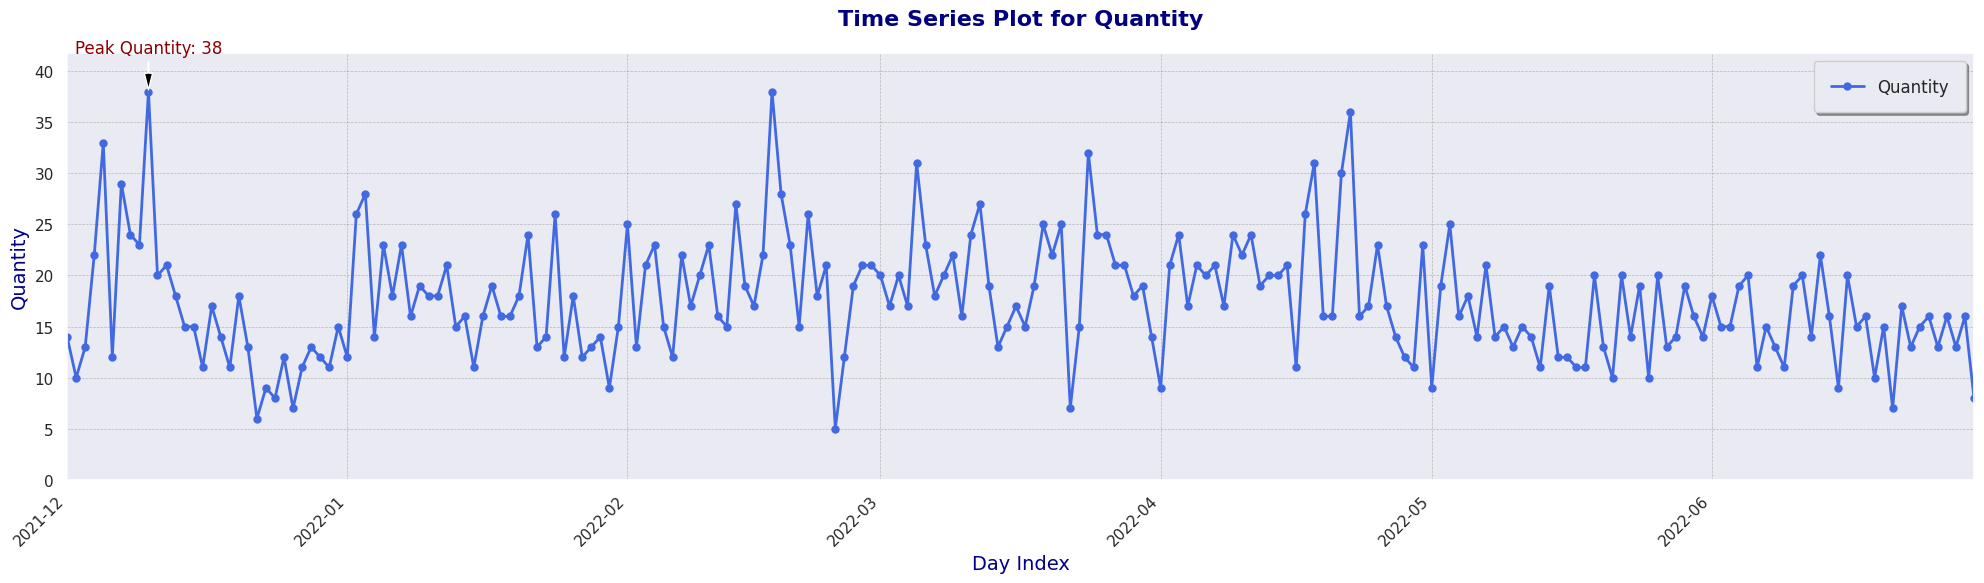

In [ ]:
plt.figure(figsize=(20, 6))

# Time Series Plot for Quantity i.e QUANTITY VS DAY_INDEX LINE PLOT
plt.plot(masterdata.index, masterdata['Quantity'], color='royalblue', linewidth=2, marker='o', markersize=5, label='Quantity')

plt.title('Time Series Plot for Quantity', fontsize=16, fontweight='bold', color='navy', pad=20)
plt.xlabel('Day Index', fontsize=14, color='darkblue')
plt.ylabel('Quantity', fontsize=14, color='darkblue')

plt.legend(loc='upper right', fontsize=12, shadow=True, borderpad=1)

plt.xlim(masterdata.index.min(), masterdata.index.max())
plt.ylim(0, masterdata['Quantity'].max() * 1.1)  # Leave 10% space above the highest value

plt.xticks(rotation=45, ha='right')

plt.grid( which='both', color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

#annotation to highlight a peak data point
peak_day = masterdata['Quantity'].idxmax()  # Day of max Impressions
peak_value = masterdata['Quantity'].max()  # Max Impressions value
plt.annotate(f'Peak Quantity: {peak_value}',
             xy=(peak_day, peak_value),
             xytext=(peak_day, peak_value * 1.1),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=6),
             fontsize=12, color='darkred', ha='center')

plt.tight_layout()
plt.show()

*   PEAK SALES QUANTITY IS 38.
*   PRESENCE OF SEASONALITY
*   BIG FLUCTUATIONS IN SALES TILL MAY AND THEN ALMOST CONSISTENT TILL JULY



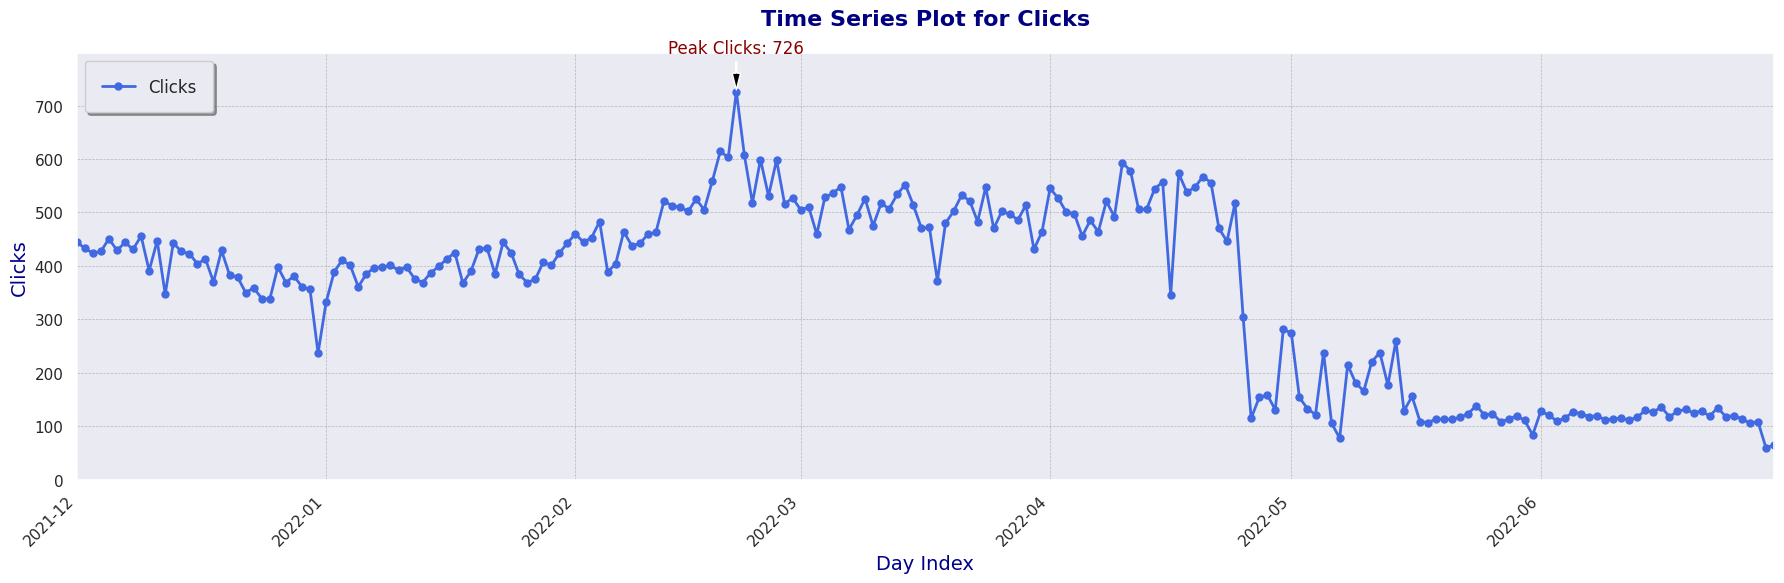

In [ ]:
plt.figure(figsize=(18, 6))

# Time Series Plot for CLICKS i.e CLICKS VS DAY_INDEX LINE PLOT
plt.plot(masterdata.index, masterdata['Clicks'], color='royalblue', linewidth=2, marker='o', markersize=5, label='Clicks')

plt.title('Time Series Plot for Clicks', fontsize=16, fontweight='bold', color='navy', pad=20)
plt.xlabel('Day Index', fontsize=14, color='darkblue')
plt.ylabel('Clicks', fontsize=14, color='darkblue')

plt.legend(loc='upper left', fontsize=12, shadow=True, borderpad=1)

plt.xlim(masterdata.index.min(), masterdata.index.max())
plt.ylim(0, masterdata['Clicks'].max() * 1.1)  # Leave 10% space above the highest value

plt.xticks(rotation=45, ha='right')

plt.grid( which='both', color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

#annotation to highlight a peak data point
peak_day = masterdata['Clicks'].idxmax()  # Day of max Impressions
peak_value = masterdata['Clicks'].max()  # Max Impressions value
plt.annotate(f'Peak Clicks: {peak_value}',
             xy=(peak_day, peak_value),
             xytext=(peak_day, peak_value * 1.1),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=6),
             fontsize=12, color='darkred', ha='center')

plt.tight_layout()
plt.show()

*   PEAK CLICKS IS 726.
*   BIG FLUCTUATIONS AND INCREASING TREND IN CLICKS TILL MAY AND THEN ALMOST
  DECREASES AND THEN CONSISTENT TILL JULY



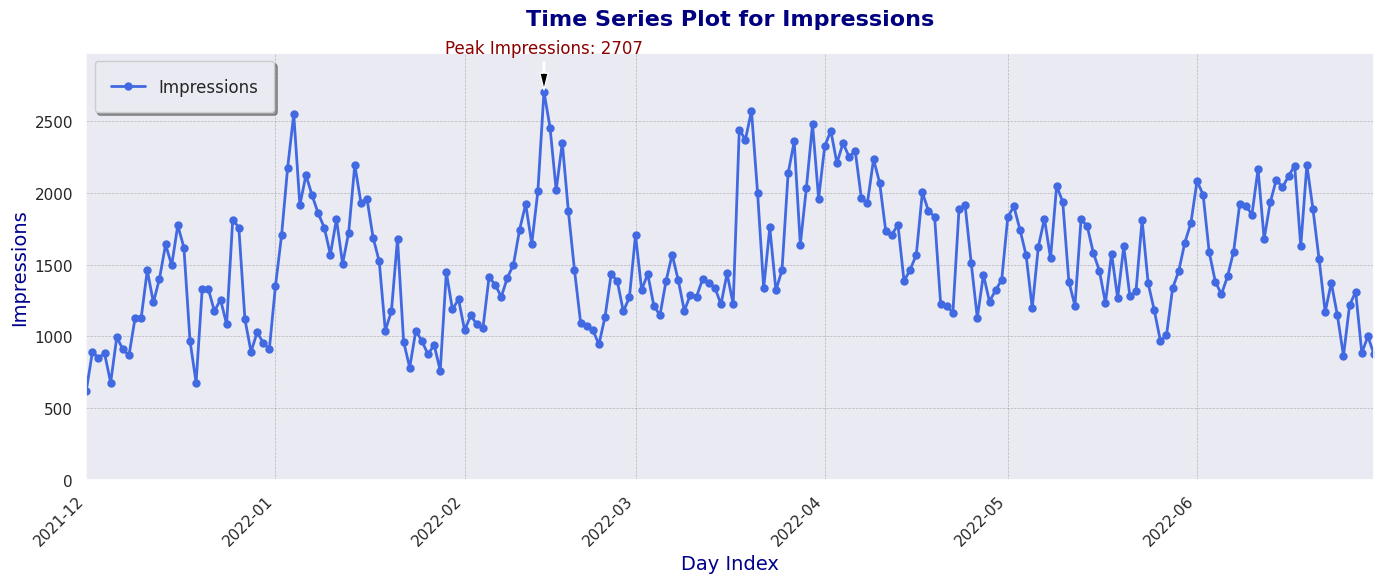

In [ ]:
plt.figure(figsize=(14, 6))


# Time Series Plot for IMPRESSIONS i.e IMPRESSIONS VS DAY_INDEX LINE PLOT
plt.plot(masterdata.index, masterdata['Impressions'], color='royalblue', linewidth=2, marker='o', markersize=5, label='Impressions')

plt.title('Time Series Plot for Impressions', fontsize=16, fontweight='bold', color='navy', pad=20)
plt.xlabel('Day Index', fontsize=14, color='darkblue')
plt.ylabel('Impressions', fontsize=14, color='darkblue')

plt.legend(loc='upper left', fontsize=12, shadow=True, borderpad=1)

plt.xlim(masterdata.index.min(), masterdata.index.max())
plt.ylim(0, masterdata['Impressions'].max() * 1.1)  # Leave 10% space above the highest value

plt.xticks(rotation=45, ha='right')

plt.grid( which='both', color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

#annotation to highlight a peak data point
peak_day = masterdata['Impressions'].idxmax()  # Day of max Impressions
peak_value = masterdata['Impressions'].max()  # Max Impressions value
plt.annotate(f'Peak Impressions: {peak_value}',
             xy=(peak_day, peak_value),
             xytext=(peak_day, peak_value * 1.1),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=6),
             fontsize=12, color='darkred', ha='center')

plt.tight_layout()
plt.show()

*   PEAK IMPRESSIONS IS 2707.
*   OVERALL IMPRESSIONS SHOWS AN INCREASING TREND.



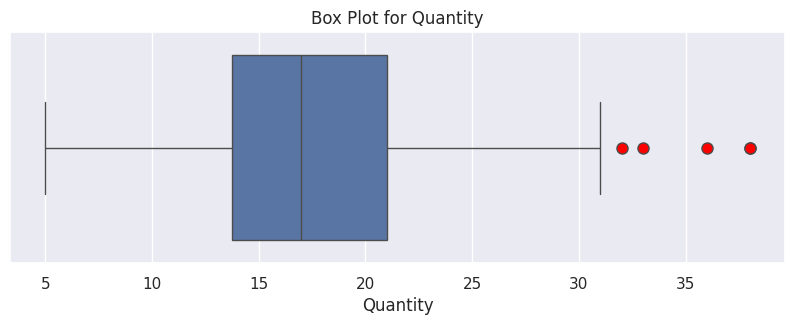

In [ ]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=masterdata['Quantity'],
            flierprops=dict(marker='o', markerfacecolor='red', markersize=8)) # BOXPLOT OF QUANTITY TO FIND OUTLIERS
plt.title('Box Plot for Quantity')
plt.xlabel('Quantity')
plt.show()

*   OUTIERS ARE PRESENT.


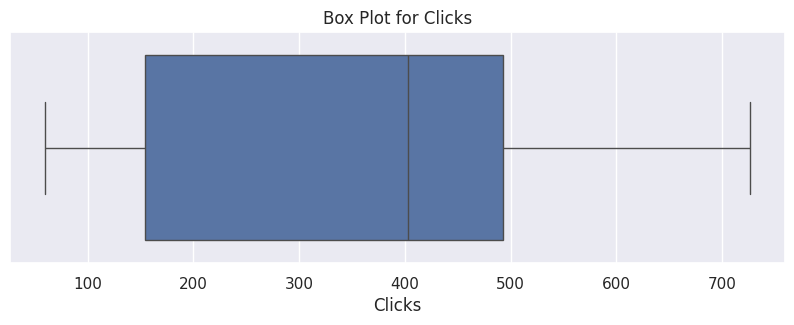

In [ ]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=masterdata['Clicks'],
            flierprops=dict(marker='o', markerfacecolor='red', markersize=8)) # BOXPLOT OF CLICKS TO FIND OUTLIERS
plt.title('Box Plot for Clicks')
plt.xlabel('Clicks')
plt.show()

*   NO OUTIERS ARE PRESENT.


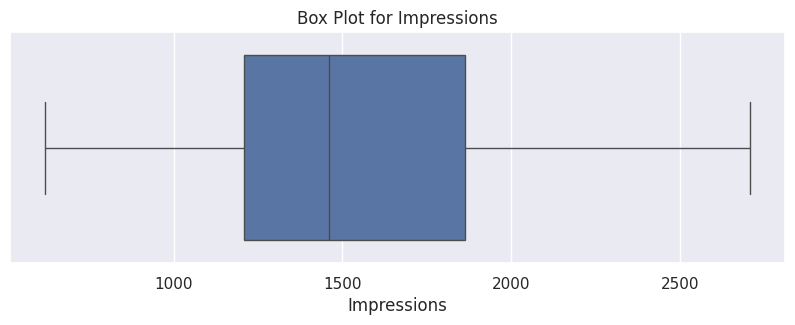

In [ ]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=masterdata['Impressions'],
            flierprops=dict(marker='o', markerfacecolor='red', markersize=8)) # BOXPLOT OF IMPRESSIONS TO FIND OUTLIERS
plt.title('Box Plot for Impressions')
plt.xlabel('Impressions')
plt.show()

*   NO OUTIERS ARE PRESENT.


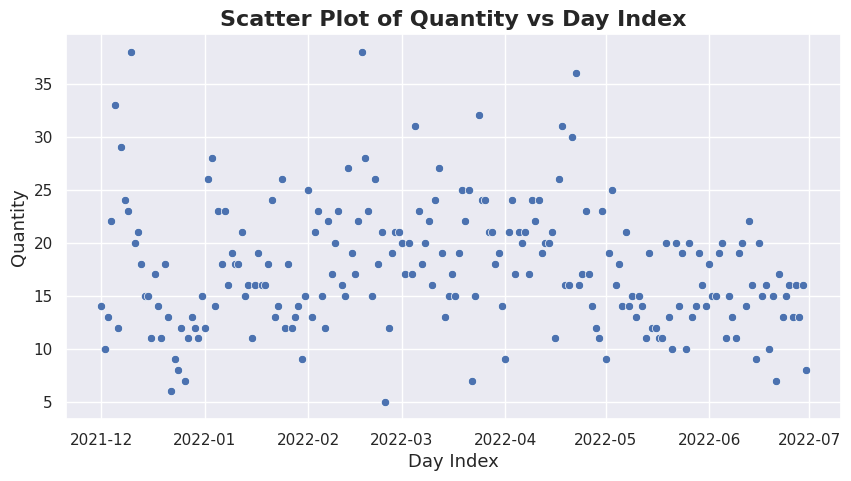

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=masterdata, x=masterdata.index, y='Quantity') # Scatter Plot of Quantity vs Day Index
plt.title('Scatter Plot of Quantity vs Day Index', fontsize=16, fontweight='bold')
plt.xlabel('Day Index', fontsize=13)
plt.ylabel('Quantity', fontsize=13)
plt.show()

*   NO MUCH CORRELATION .


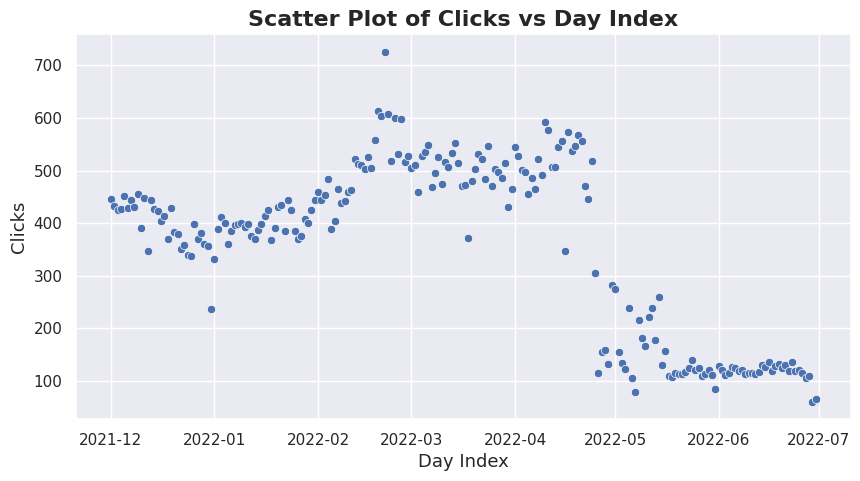

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=masterdata, x=masterdata.index, y='Clicks') # Scatter Plot of Clicks vs Day Index
plt.title('Scatter Plot of Clicks vs Day Index', fontsize=16, fontweight='bold')
plt.xlabel('Day Index', fontsize=13)
plt.ylabel('Clicks', fontsize=13)
plt.show()

*   CLICKS ARE HIGHER IN  DEC,JAN.FEB,MAR,APR.
*   THEN REDUCES FROM MARCH AND THEN CONSISTENT TILL JULY




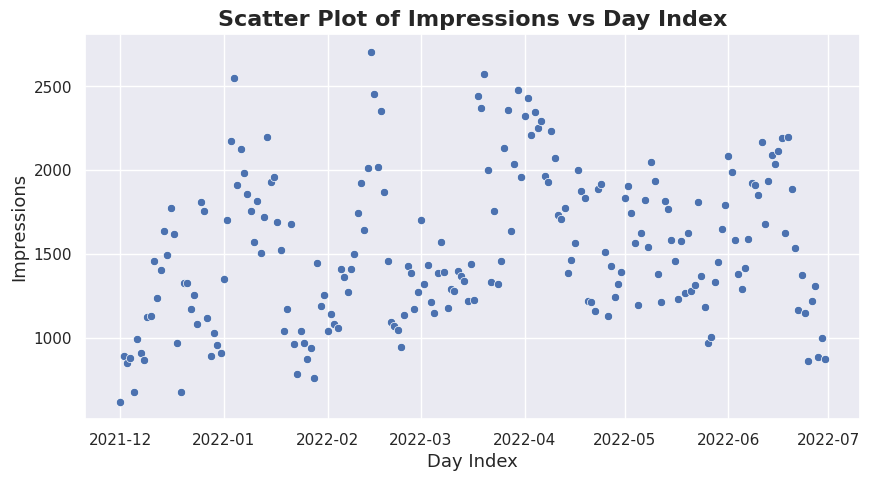

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=masterdata, x=masterdata.index, y='Impressions') # Scatter Plot of Impressions vs Day Index
plt.title('Scatter Plot of Impressions vs Day Index', fontsize=16, fontweight='bold')
plt.xlabel('Day Index', fontsize=13)
plt.ylabel('Impressions', fontsize=13)
plt.show()

*   NO MUCH CORRELATION .


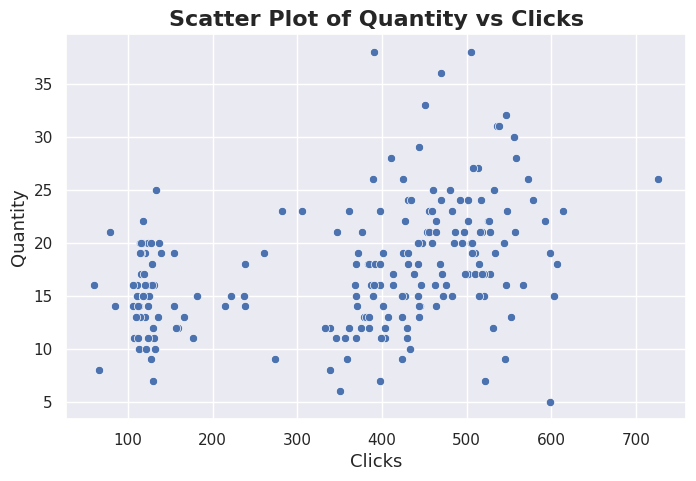

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=masterdata, x='Clicks', y='Quantity') #Scatter Plot of Quantity vs Clicks
plt.title('Scatter Plot of Quantity vs Clicks', fontsize=16, fontweight='bold')
plt.xlabel('Clicks', fontsize=13)
plt.ylabel('Quantity', fontsize=13)
plt.show()

*  AS CLICKS INCREASE SALES QUANTITY ALSO INCREASES .
*   MORE CLUSTERED.




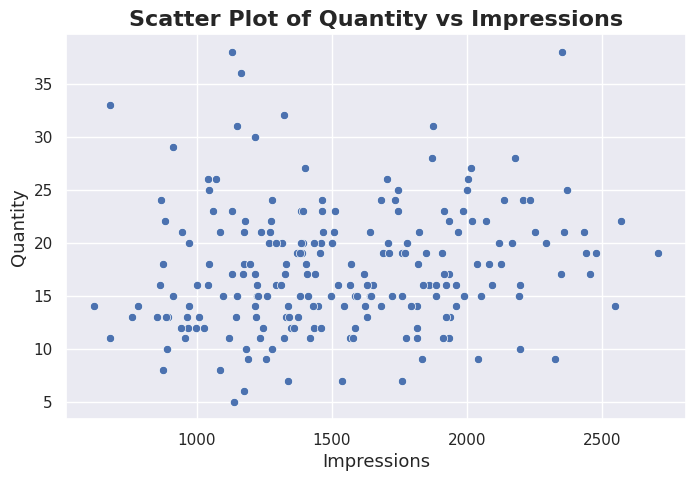

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=masterdata, x='Impressions', y='Quantity') # Scatter Plot of Quantity vs Impressions
plt.title('Scatter Plot of Quantity vs Impressions', fontsize=16, fontweight='bold')
plt.xlabel('Impressions', fontsize=13)
plt.ylabel('Quantity', fontsize=13)
plt.show()

*   NO MUCH CORRELATION .


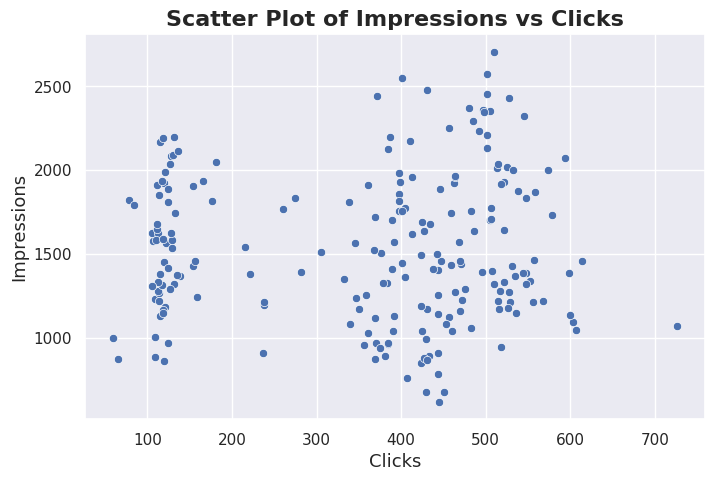

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=masterdata, x='Clicks', y='Impressions') #  Scatter Plot of Impressions vs Clicks
plt.title('Scatter Plot of Impressions vs Clicks', fontsize=16, fontweight='bold')
plt.xlabel('Clicks', fontsize=13)
plt.ylabel('Impressions', fontsize=13)
plt.show()

*  AS CLICKS INCREASE IMPRESSIONS ALSO INCREASES .
*   MORE CLUSTERED.




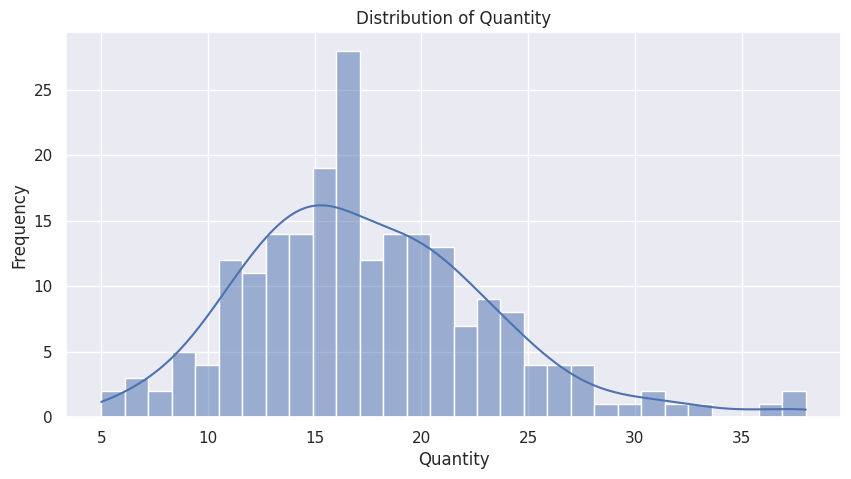

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(masterdata['Quantity'], kde=True, bins=30) # HISTOGRAM OF QUANTITY
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

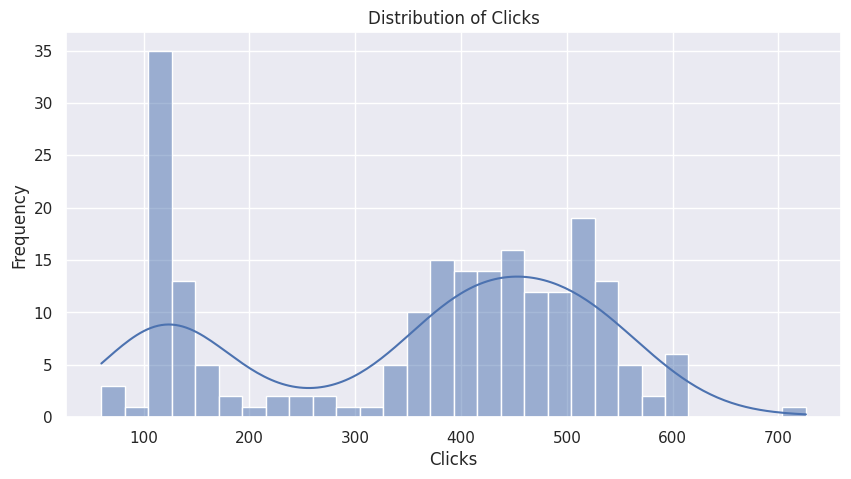

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(masterdata['Clicks'], kde=True, bins=30) # HISTOGRAM OF CLICKS
plt.title('Distribution of Clicks')
plt.xlabel('Clicks')
plt.ylabel('Frequency')
plt.show()

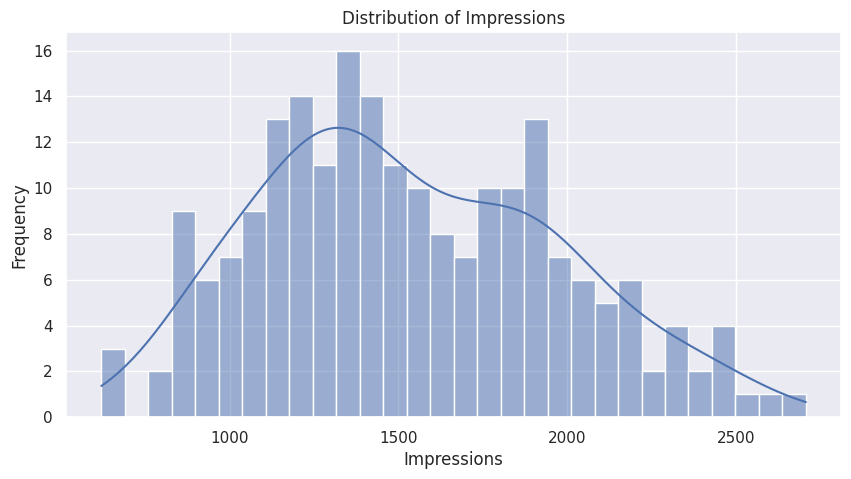

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(masterdata['Impressions'], kde=True, bins=30) # HISTOGRAM OF IMPRESSIONS
plt.title('Distribution of Impressions')
plt.xlabel('Impressions')
plt.ylabel('Frequency')
plt.show()

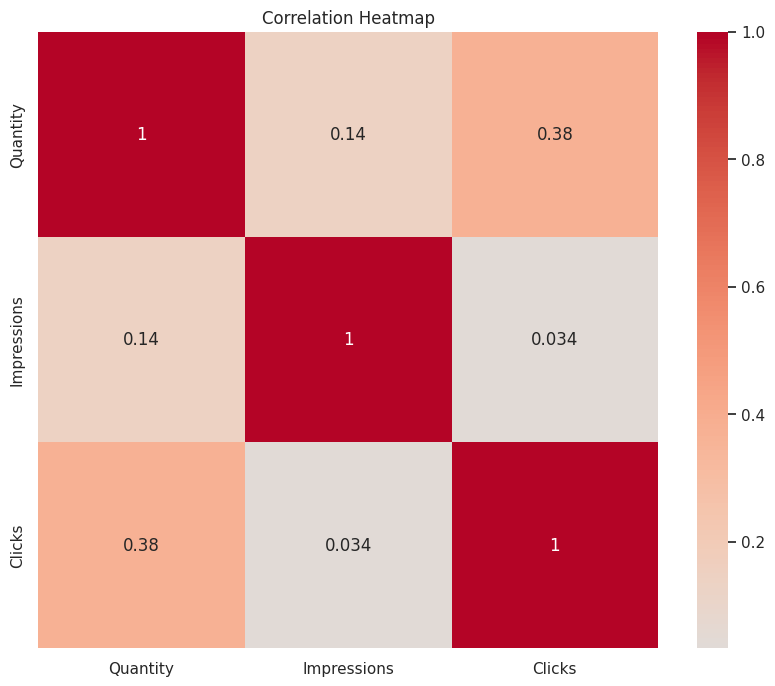

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = masterdata.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0) # HEATMAP OF CORRRELATION MATRIX
plt.title('Correlation Heatmap')
plt.show()

**MISSING** VALUES-IMPUTATION

In [ ]:
print("MISSING VALUES:")
missingrows_count=masterdata.isnull().sum()
print(missingrows_count)

MISSING VALUES:
Quantity       0
Impressions    0
Clicks         0
dtype: int64


*   *NO IMPUTATION REQUIRED AS THERE ARE NO MISSING VALUES*

DROPING DUPLICATES

In [ ]:
masterdata.drop_duplicates()

Quantity  Impressions  Clicks
Day Index                                
2021-12-01        14          620     445
2021-12-02        10          890     433
2021-12-03        13          851     424
2021-12-04        22          881     427
2021-12-05        33          678     451
...              ...          ...     ...
2022-06-26        13         1218     114
2022-06-27        16         1311     106
2022-06-28        13          885     109
2022-06-29        16         1000      60
2022-06-30         8          875      65

[212 rows x 3 columns]


*   *NO DUPLICATES FOUND AS NO ROWS WERE DROPPED AFTER USING drop_duplicates()*



In [ ]:
print(masterdata) # DISPLAYING DATASET

            Quantity  Impressions  Clicks
Day Index                                
2021-12-01        14          620     445
2021-12-02        10          890     433
2021-12-03        13          851     424
2021-12-04        22          881     427
2021-12-05        33          678     451
...              ...          ...     ...
2022-06-26        13         1218     114
2022-06-27        16         1311     106
2022-06-28        13          885     109
2022-06-29        16         1000      60
2022-06-30         8          875      65

[212 rows x 3 columns]


DETECTING OUTLIERS

In [ ]:
outliers={}
for column in masterdata.columns:
  q1=masterdata[column].quantile(0.25)
  q3=masterdata[column].quantile(0.75)
  iqr=q3-q1
  lower_bound=q1-1.5*iqr
  upper_bound=q3+1.5*iqr
  outliers[column]=[]
  for value in masterdata[column]:
    if value<lower_bound or value>upper_bound:
        outliers[column].append(value)
print("THE OUTLIERS OF QUANTITY COLUMN ARE:")
print(outliers['Quantity'])
print("THE OUTLIERS OF IMPRESSIONS COLUMN ARE:")
print(outliers['Impressions'])
print("THE OUTLIERS OF CLICKS COLUMN ARE:")
print(outliers['Clicks'])

THE OUTLIERS OF QUANTITY COLUMN ARE:
[33, 38, 38, 32, 36]
THE OUTLIERS OF IMPRESSIONS COLUMN ARE:
[]
THE OUTLIERS OF CLICKS COLUMN ARE:
[]


*   FIVE OUTLIERS IN QUANTITY COLUMN

REPLACING OUTLIERS WITH 97TH PERCENTILE

In [ ]:
percentile97=masterdata['Quantity'].quantile(0.97) # FINDING 97TH PERCENTILE VALUE
print(percentile97)

30.669999999999987


In [ ]:

  q1=masterdata['Quantity'].quantile(0.25)
  q3=masterdata['Quantity'].quantile(0.75)
  iqr=q3-q1
  lower_bound=q1-1.5*iqr
  upper_bound=q3+1.5*iqr
  masterdata['Imputed_Quantity'] = np.where(masterdata['Quantity'] > upper_bound,
                                  percentile97,
                                  masterdata['Quantity']) # REPLACING OUTLIERS WITH 97 TH PERCENTILE VALUE

In [ ]:
print(masterdata.columns)

Index(['Quantity', 'Impressions', 'Clicks', 'Imputed_Quantity'], dtype='object')


In [ ]:
outliers={}
for column in masterdata.columns:
  q1=masterdata[column].quantile(0.25)
  q3=masterdata[column].quantile(0.75)
  iqr=q3-q1
  lower_bound=q1-1.5*iqr
  upper_bound=q3+1.5*iqr
  outliers[column]=[]
  for value in masterdata[column]:
    if value<lower_bound or value>upper_bound:
        outliers[column].append(value)
print("THE OUTLIERS OF OLD QUANTITY COLUMN ARE:")
print(outliers['Quantity'])
print("THE OUTLIERS OF NEW IMPUTED QUANTITY COLUMN ARE:")
print(outliers['Imputed_Quantity'])
print("THE OUTLIERS OF IMPRESSIONS COLUMN ARE:")
print(outliers['Impressions'])
print("THE OUTLIERS OF CLICKS COLUMN ARE:")
print(outliers['Clicks'])

THE OUTLIERS OF OLD QUANTITY COLUMN ARE:
[33, 38, 38, 32, 36]
THE OUTLIERS OF NEW IMPUTED QUANTITY COLUMN ARE:
[]
THE OUTLIERS OF IMPRESSIONS COLUMN ARE:
[]
THE OUTLIERS OF CLICKS COLUMN ARE:
[]




*   REPLACED THE OUTLIERS IN QUANTITY COLUMN BY 97TH PERCENTILE VALUE AND STORED THE CLEANED DATA INTO THE IMPUTED_QUANTITY COLUMN.



FEATURE ENGINEERING
******************

In [ ]:
masterdata.head(n=10) # DISPLAYING FIRST TEN ROWS OF MASTERDATASET

Quantity  Impressions  Clicks  Imputed_Quantity
Day Index                                                  
2021-12-01        14          620     445             14.00
2021-12-02        10          890     433             10.00
2021-12-03        13          851     424             13.00
2021-12-04        22          881     427             22.00
2021-12-05        33          678     451             30.67
2021-12-06        12          995     429             12.00
2021-12-07        29          910     444             29.00
2021-12-08        24          867     431             24.00
2021-12-09        23         1128     456             23.00
2021-12-10        38         1129     391             30.67

In [ ]:

#LOG TRANSFORMED ATTRIBUTES
# FINDING LOG VALUES OF QUANTITY,CLICKS,IMPRESSIONS AND STORING INTO NEW COLUMNS RESPECTIVELY
masterdata['Log_quantity'] = np.log1p(masterdata['Quantity'])
masterdata['Log_clicks'] = np.log1p(masterdata['Clicks'])
masterdata['Log_impressions'] = np.log1p(masterdata['Impressions'])

In [ ]:
# EXTRACT MONTH AND YEAR
masterdata['YearMonth'] = masterdata.index.to_period('M')
masterdata[['YearMonth']].head(n=40)

YearMonth
Day Index           
2021-12-01   2021-12
2021-12-02   2021-12
2021-12-03   2021-12
2021-12-04   2021-12
2021-12-05   2021-12
2021-12-06   2021-12
2021-12-07   2021-12
2021-12-08   2021-12
2021-12-09   2021-12
2021-12-10   2021-12
2021-12-11   2021-12
2021-12-12   2021-12
2021-12-13   2021-12
2021-12-14   2021-12
2021-12-15   2021-12
2021-12-16   2021-12
2021-12-17   2021-12
2021-12-18   2021-12
2021-12-19   2021-12
2021-12-20   2021-12
2021-12-21   2021-12
2021-12-22   2021-12
2021-12-23   2021-12
2021-12-24   2021-12
2021-12-25   2021-12
2021-12-26   2021-12
2021-12-27   2021-12
2021-12-28   2021-12
2021-12-29   2021-12
2021-12-30   2021-12
2021-12-31   2021-12
2022-01-01   2022-01
2022-01-02   2022-01
2022-01-03   2022-01
2022-01-04   2022-01
2022-01-05   2022-01
2022-01-06   2022-01
2022-01-07   2022-01
2022-01-08   2022-01
2022-01-09   2022-01

In [ ]:
# EXTRACT MONTH NAME
masterdata['Monthname'] = masterdata.index.month_name() # EXTRACTING MONTHNAME AND STORING IT IN SEPARATE COLUMN
masterdata[['Monthname']].head(n=40) # PRINTING THE NEW COLUMN

Monthname
Day Index           
2021-12-01  December
2021-12-02  December
2021-12-03  December
2021-12-04  December
2021-12-05  December
2021-12-06  December
2021-12-07  December
2021-12-08  December
2021-12-09  December
2021-12-10  December
2021-12-11  December
2021-12-12  December
2021-12-13  December
2021-12-14  December
2021-12-15  December
2021-12-16  December
2021-12-17  December
2021-12-18  December
2021-12-19  December
2021-12-20  December
2021-12-21  December
2021-12-22  December
2021-12-23  December
2021-12-24  December
2021-12-25  December
2021-12-26  December
2021-12-27  December
2021-12-28  December
2021-12-29  December
2021-12-30  December
2021-12-31  December
2022-01-01   January
2022-01-02   January
2022-01-03   January
2022-01-04   January
2022-01-05   January
2022-01-06   January
2022-01-07   January
2022-01-08   January
2022-01-09   January

In [ ]:
summary_Monthname = masterdata.groupby('Monthname')[['Quantity','Impressions', 'Clicks']].mean()
summary_Monthname

Quantity  Impressions      Clicks
Monthname                                    
April      19.966667  1761.900000  449.333333
December   15.967742  1157.645161  396.258065
February   19.785714  1501.500000  513.285714
January    17.193548  1531.096774  397.225806
June       14.900000  1611.433333  116.800000
March      20.000000  1638.806452  497.387097
May        15.193548  1526.612903  147.290323

*   INCREASE IN QUANTITY SALES FROM JANUARY TO MARCH AND THEN REDUCES.
*   MAXIMUM IMPRESSIONS IN APRIL.
*   MAXIMUM CLICKS IN FEBRUARY.
*   VERY LOW CLICKS IN MAY AND JUNE. *italicized text*





In [ ]:
# EXTRACT DAY OF WEEK
masterdata['Dayofweek'] = masterdata.index.day_name() # NEW COLUMN FOR GETING WHICH DAY IT IS
masterdata[['Dayofweek']].head()

Dayofweek
Day Index            
2021-12-01  Wednesday
2021-12-02   Thursday
2021-12-03     Friday
2021-12-04   Saturday
2021-12-05     Sunday

In [ ]:
summary_Dayofweek = masterdata.groupby('Dayofweek')[['Quantity','Impressions', 'Clicks']].mean()
summary_Dayofweek

Quantity  Impressions      Clicks
Dayofweek                                    
Friday     17.966667  1531.900000  351.333333
Monday     18.833333  1612.100000  370.066667
Saturday   18.100000  1580.233333  359.300000
Sunday     17.866667  1580.000000  377.933333
Thursday   17.193548  1427.096774  355.064516
Tuesday    16.433333  1546.366667  349.333333
Wednesday  16.451613  1450.419355  344.935484

*   MAXIMUM SALES IN MONDAY
*   SALES MORE AT WEEKEND
*   MAX IMPRESSIONS ON MONDAY
*   MAX CLICKS ON SUNDAY *italicized text*





In [ ]:
# EXTRACT WEEK OF MONTH
#NEW COLUMN FOR GETTING WHICH WEEK OF MONTH IT IS
def week_of_month(date):
    first_day = date.replace(day=1)
    return (date.day + first_day.weekday()) // 7+1 #+1 TO ENSURE WEEK IS NOT 0
masterdata['Weekofmonth'] = masterdata.index.to_series().apply(week_of_month)#DAY_INDEX IS CONVERTED INTO ANDAS SERIES FOR HANDLINH
masterdata[['Weekofmonth']].head(n=65)

Weekofmonth
Day Index              
2021-12-01            1
2021-12-02            1
2021-12-03            1
2021-12-04            1
2021-12-05            2
...                 ...
2022-01-30            6
2022-01-31            6
2022-02-01            1
2022-02-02            1
2022-02-03            1

[65 rows x 1 columns]

In [ ]:
summary_Weekofmonth = masterdata.groupby('Weekofmonth')[['Quantity','Impressions', 'Clicks']].mean()
summary_Weekofmonth

Quantity  Impressions      Clicks
Weekofmonth                                    
1            17.619048  1379.190476  398.761905
2            19.938776  1651.367347  364.693878
3            17.877551  1756.122449  380.142857
4            16.673469  1445.102041  379.163265
5            15.538462  1298.333333  289.923077
6            14.600000  1469.200000  236.400000

*   MAXIMUM SALES IN SECOND WEEK
*   MAX IMPRESSIONS IN THIRD WEEK
*   MAX CLICKS IN FIRST WEEK


In [ ]:
# EXTRACTING DAYOFWEEK_NUMERIC AND MONTH_NUMERIC
# GIVING NUMERIC VALUE TO DAY
def daytonumber(day):
    days = {'Monday': 1,'Tuesday': 2,'Wednesday': 3,'Thursday': 4,'Friday': 5,'Saturday': 6,'Sunday': 7}
    return days[day]
masterdata['Dayofweek_numeric'] = masterdata['Dayofweek'].apply(daytonumber)
# GIVING NUMERIC VALUE TO MONTH
def monthtonumber(month):
    months = {'January': 1,'February': 2,'March': 3,'April': 4,'May': 5,'June': 6,'July': 7,'August': 8,'September': 9,'October': 10,'November':11,'December':12}
    return months[month]
masterdata['Month_numeric'] = masterdata['Monthname'].apply(monthtonumber)

In [ ]:
masterdata.head(n=40) # DISPLAYING FIRST 40 ROWS

Quantity  Impressions  Clicks  Imputed_Quantity  Log_quantity  \
Day Index                                                                   
2021-12-01        14          620     445             14.00      2.708050   
2021-12-02        10          890     433             10.00      2.397895   
2021-12-03        13          851     424             13.00      2.639057   
2021-12-04        22          881     427             22.00      3.135494   
2021-12-05        33          678     451             30.67      3.526361   
2021-12-06        12          995     429             12.00      2.564949   
2021-12-07        29          910     444             29.00      3.401197   
2021-12-08        24          867     431             24.00      3.218876   
2021-12-09        23         1128     456             23.00      3.178054   
2021-12-10        38         1129     391             30.67      3.663562   
2021-12-11        20         1461     447             20.00      3.044522   
2021-12-12        21         1237     347             21.00      3.091042   
2021-12-13        18         1403     443             18.00      2.944439   
2021-12-14        15         1641     427             15.00      2.772589   
2021-12-15        15         1496     423             15.00      2.772589   
2021-12-16        11         1775     404             11.00      2.484907   
2021-12-17        17         1619     413             17.00      2.890372   
2021-12-18        14          969     370             14.00      2.708050   
2021-12-19        11          678     429             11.00      2.484907   
2021-12-20        18         1330     383             18.00      2.944439   
2021-12-21        13         1331     379             13.00      2.639057   
2021-12-22         6         1176     350              6.00      1.945910   
2021-12-23         9         1257     359              9.00      2.302585   
2021-12-24         8         1085     339              8.00      2.197225   
2021-12-25        12         1814     338             12.00      2.564949   
2021-12-26         7         1759     398              7.00      2.079442   
2021-12-27        11         1119     369             11.00      2.484907   
2021-12-28        13          893     381             13.00      2.639057   
2021-12-29        12         1028     361             12.00      2.564949   
2021-12-30        11          956     356             11.00      2.484907   
2021-12-31        15          911     237             15.00      2.772589   
2022-01-01        12         1350     332             12.00      2.564949   
2022-01-02        26         1704     389             26.00      3.295837   
2022-01-03        28         2177     411             28.00      3.367296   
2022-01-04        14         2549     401             14.00      2.708050   
2022-01-05        23         1915     361             23.00      3.178054   
2022-01-06        18         2125     385             18.00      2.944439   
2022-01-07        23         1984     397             23.00      3.178054   
2022-01-08        16         1859     398             16.00      2.833213   
2022-01-09        19         1759     401             19.00      2.995732   

            Log_clicks  Log_impressions YearMonth Monthname  Dayofweek  \
Day Index                                                                
2021-12-01    6.100319         6.431331   2021-12  December  Wednesday   
2021-12-02    6.073045         6.792344   2021-12  December   Thursday   
2021-12-03    6.052089         6.747587   2021-12  December     Friday   
2021-12-04    6.059123         6.782192   2021-12  December   Saturday   
2021-12-05    6.113682         6.520621   2021-12  December     Sunday   
2021-12-06    6.063785         6.903747   2021-12  December     Monday   
2021-12-07    6.098074         6.814543   2021-12  December    Tuesday   
2021-12-08    6.068426         6.766192   2021-12  December  Wednesday   
2021-12-09    6.124683         7.0290

In [ ]:
# MAPPING WEEKDAYS AND MONTHS INTO SEPARATE COLUMNS
masterdata.loc[masterdata['Dayofweek'] == 'Monday','Monday'] = 1
masterdata.loc[masterdata['Dayofweek'] == 'Tuesday','Tuesday'] = 1
masterdata.loc[masterdata['Dayofweek'] == 'Wednesday','Wednesday'] = 1
masterdata.loc[masterdata['Dayofweek'] == 'Thursday','Thursday'] = 1
masterdata.loc[masterdata['Dayofweek'] == 'Friday','Friday'] = 1
masterdata.loc[masterdata['Dayofweek'] == 'Saturday','Saturday'] = 1
masterdata.loc[masterdata['Dayofweek'] == 'Sunday','Sunday'] = 1

masterdata.loc[masterdata['Monthname'] == 'January','January'] = 1
masterdata.loc[masterdata['Monthname'] == 'February','February'] = 1
masterdata.loc[masterdata['Monthname'] == 'March','March'] = 1
masterdata.loc[masterdata['Monthname'] == 'April','April'] = 1
masterdata.loc[masterdata['Monthname'] == 'May','May'] = 1
masterdata.loc[masterdata['Monthname'] == 'June','June'] = 1
masterdata.loc[masterdata['Monthname'] == 'July','July'] = 1
masterdata.loc[masterdata['Monthname'] == 'August','August'] = 1
masterdata.loc[masterdata['Monthname'] == 'September','September'] = 1
masterdata.loc[masterdata['Monthname'] == 'October','October'] = 1
masterdata.loc[masterdata['Monthname'] == 'November','November'] = 1
masterdata.loc[masterdata['Monthname'] == 'December','December'] = 1


In [ ]:
masterdata.head(n=40)

Quantity  Impressions  Clicks  Imputed_Quantity  Log_quantity  \
Day Index                                                                   
2021-12-01        14          620     445             14.00      2.708050   
2021-12-02        10          890     433             10.00      2.397895   
2021-12-03        13          851     424             13.00      2.639057   
2021-12-04        22          881     427             22.00      3.135494   
2021-12-05        33          678     451             30.67      3.526361   
2021-12-06        12          995     429             12.00      2.564949   
2021-12-07        29          910     444             29.00      3.401197   
2021-12-08        24          867     431             24.00      3.218876   
2021-12-09        23         1128     456             23.00      3.178054   
2021-12-10        38         1129     391             30.67      3.663562   
2021-12-11        20         1461     447             20.00      3.044522   
2021-12-12        21         1237     347             21.00      3.091042   
2021-12-13        18         1403     443             18.00      2.944439   
2021-12-14        15         1641     427             15.00      2.772589   
2021-12-15        15         1496     423             15.00      2.772589   
2021-12-16        11         1775     404             11.00      2.484907   
2021-12-17        17         1619     413             17.00      2.890372   
2021-12-18        14          969     370             14.00      2.708050   
2021-12-19        11          678     429             11.00      2.484907   
2021-12-20        18         1330     383             18.00      2.944439   
2021-12-21        13         1331     379             13.00      2.639057   
2021-12-22         6         1176     350              6.00      1.945910   
2021-12-23         9         1257     359              9.00      2.302585   
2021-12-24         8         1085     339              8.00      2.197225   
2021-12-25        12         1814     338             12.00      2.564949   
2021-12-26         7         1759     398              7.00      2.079442   
2021-12-27        11         1119     369             11.00      2.484907   
2021-12-28        13          893     381             13.00      2.639057   
2021-12-29        12         1028     361             12.00      2.564949   
2021-12-30        11          956     356             11.00      2.484907   
2021-12-31        15          911     237             15.00      2.772589   
2022-01-01        12         1350     332             12.00      2.564949   
2022-01-02        26         1704     389             26.00      3.295837   
2022-01-03        28         2177     411             28.00      3.367296   
2022-01-04        14         2549     401             14.00      2.708050   
2022-01-05        23         1915     361             23.00      3.178054   
2022-01-06        18         2125     385             18.00      2.944439   
2022-01-07        23         1984     397             23.00      3.178054   
2022-01-08        16         1859     398             16.00      2.833213   
2022-01-09        19         1759     401             19.00      2.995732   

            Log_clicks  Log_impressions YearMonth Monthname  Dayofweek  ...  \
Day Index                                                               ...   
2021-12-01    6.100319         6.431331   2021-12  December  Wednesday  ...   
2021-12-02    6.073045         6.792344   2021-12  December   Thursday  ...   
2021-12-03    6.052089         6.747587   2021-12  December     Friday  ...   
2021-12-04    6.059123         6.782192   2021-12  December   Saturday  ...   
2021-12-05    6.113682         6.520621   2021-12  December     Sunday  ...   
2021-12-06    6.063785         6.903747   2021-12  December     Monday  ...   
2021-12-07    6.098074         6.814543   2021-12  December    Tuesday  ...   
2021-12-08    6.068426         6.766192   2021-12  December  Wedne

In [ ]:
# REPLACING NaN VALUES WITH ZERO
weekdayscol = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

monthscol = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
             'October', 'November', 'December']

masterdata[weekdayscol] = masterdata[weekdayscol].fillna(0)
masterdata[monthscol] = masterdata[monthscol].fillna(0)

FINAL DATA
*********

In [ ]:
masterdata.columns

Index(['Quantity', 'Impressions', 'Clicks', 'Imputed_Quantity', 'Log_quantity',
       'Log_clicks', 'Log_impressions', 'YearMonth', 'Monthname', 'Dayofweek',
       'Weekofmonth', 'Dayofweek_numeric', 'Month_numeric', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object')

In [ ]:
masterdata.head(n=40)

Quantity  Impressions  Clicks  Imputed_Quantity  Log_quantity  \
Day Index                                                                   
2021-12-01        14          620     445             14.00      2.708050   
2021-12-02        10          890     433             10.00      2.397895   
2021-12-03        13          851     424             13.00      2.639057   
2021-12-04        22          881     427             22.00      3.135494   
2021-12-05        33          678     451             30.67      3.526361   
2021-12-06        12          995     429             12.00      2.564949   
2021-12-07        29          910     444             29.00      3.401197   
2021-12-08        24          867     431             24.00      3.218876   
2021-12-09        23         1128     456             23.00      3.178054   
2021-12-10        38         1129     391             30.67      3.663562   
2021-12-11        20         1461     447             20.00      3.044522   
2021-12-12        21         1237     347             21.00      3.091042   
2021-12-13        18         1403     443             18.00      2.944439   
2021-12-14        15         1641     427             15.00      2.772589   
2021-12-15        15         1496     423             15.00      2.772589   
2021-12-16        11         1775     404             11.00      2.484907   
2021-12-17        17         1619     413             17.00      2.890372   
2021-12-18        14          969     370             14.00      2.708050   
2021-12-19        11          678     429             11.00      2.484907   
2021-12-20        18         1330     383             18.00      2.944439   
2021-12-21        13         1331     379             13.00      2.639057   
2021-12-22         6         1176     350              6.00      1.945910   
2021-12-23         9         1257     359              9.00      2.302585   
2021-12-24         8         1085     339              8.00      2.197225   
2021-12-25        12         1814     338             12.00      2.564949   
2021-12-26         7         1759     398              7.00      2.079442   
2021-12-27        11         1119     369             11.00      2.484907   
2021-12-28        13          893     381             13.00      2.639057   
2021-12-29        12         1028     361             12.00      2.564949   
2021-12-30        11          956     356             11.00      2.484907   
2021-12-31        15          911     237             15.00      2.772589   
2022-01-01        12         1350     332             12.00      2.564949   
2022-01-02        26         1704     389             26.00      3.295837   
2022-01-03        28         2177     411             28.00      3.367296   
2022-01-04        14         2549     401             14.00      2.708050   
2022-01-05        23         1915     361             23.00      3.178054   
2022-01-06        18         2125     385             18.00      2.944439   
2022-01-07        23         1984     397             23.00      3.178054   
2022-01-08        16         1859     398             16.00      2.833213   
2022-01-09        19         1759     401             19.00      2.995732   

            Log_clicks  Log_impressions YearMonth Monthname  Dayofweek  ...  \
Day Index                                                               ...   
2021-12-01    6.100319         6.431331   2021-12  December  Wednesday  ...   
2021-12-02    6.073045         6.792344   2021-12  December   Thursday  ...   
2021-12-03    6.052089         6.747587   2021-12  December     Friday  ...   
2021-12-04    6.059123         6.782192   2021-12  December   Saturday  ...   
2021-12-05    6.113682         6.520621   2021-12  December     Sunday  ...   
2021-12-06    6.063785         6.903747   2021-12  December     Monday  ...   
2021-12-07    6.098074         6.814543   2021-12  December    Tuesday  ...   
2021-12-08    6.068426         6.766192   2021-12  December  Wedne

In [ ]:
masterdata.dtypes # DATATYPES OF EACH COLUMN


Quantity                 int64
Impressions              int64
Clicks                   int64
Imputed_Quantity       float64
Log_quantity           float64
Log_clicks             float64
Log_impressions        float64
YearMonth            period[M]
Monthname               object
Dayofweek               object
Weekofmonth              int64
Dayofweek_numeric        int64
Month_numeric            int64
Monday                 float64
Tuesday                float64
Wednesday              float64
Thursday               float64
Friday                 float64
Saturday               float64
Sunday                 float64
January                float64
February               float64
March                  float64
April                  float64
May                    float64
June                   float64
July                   float64
August                 float64
September              float64
October                float64
November               float64
December               float64
dtype: object

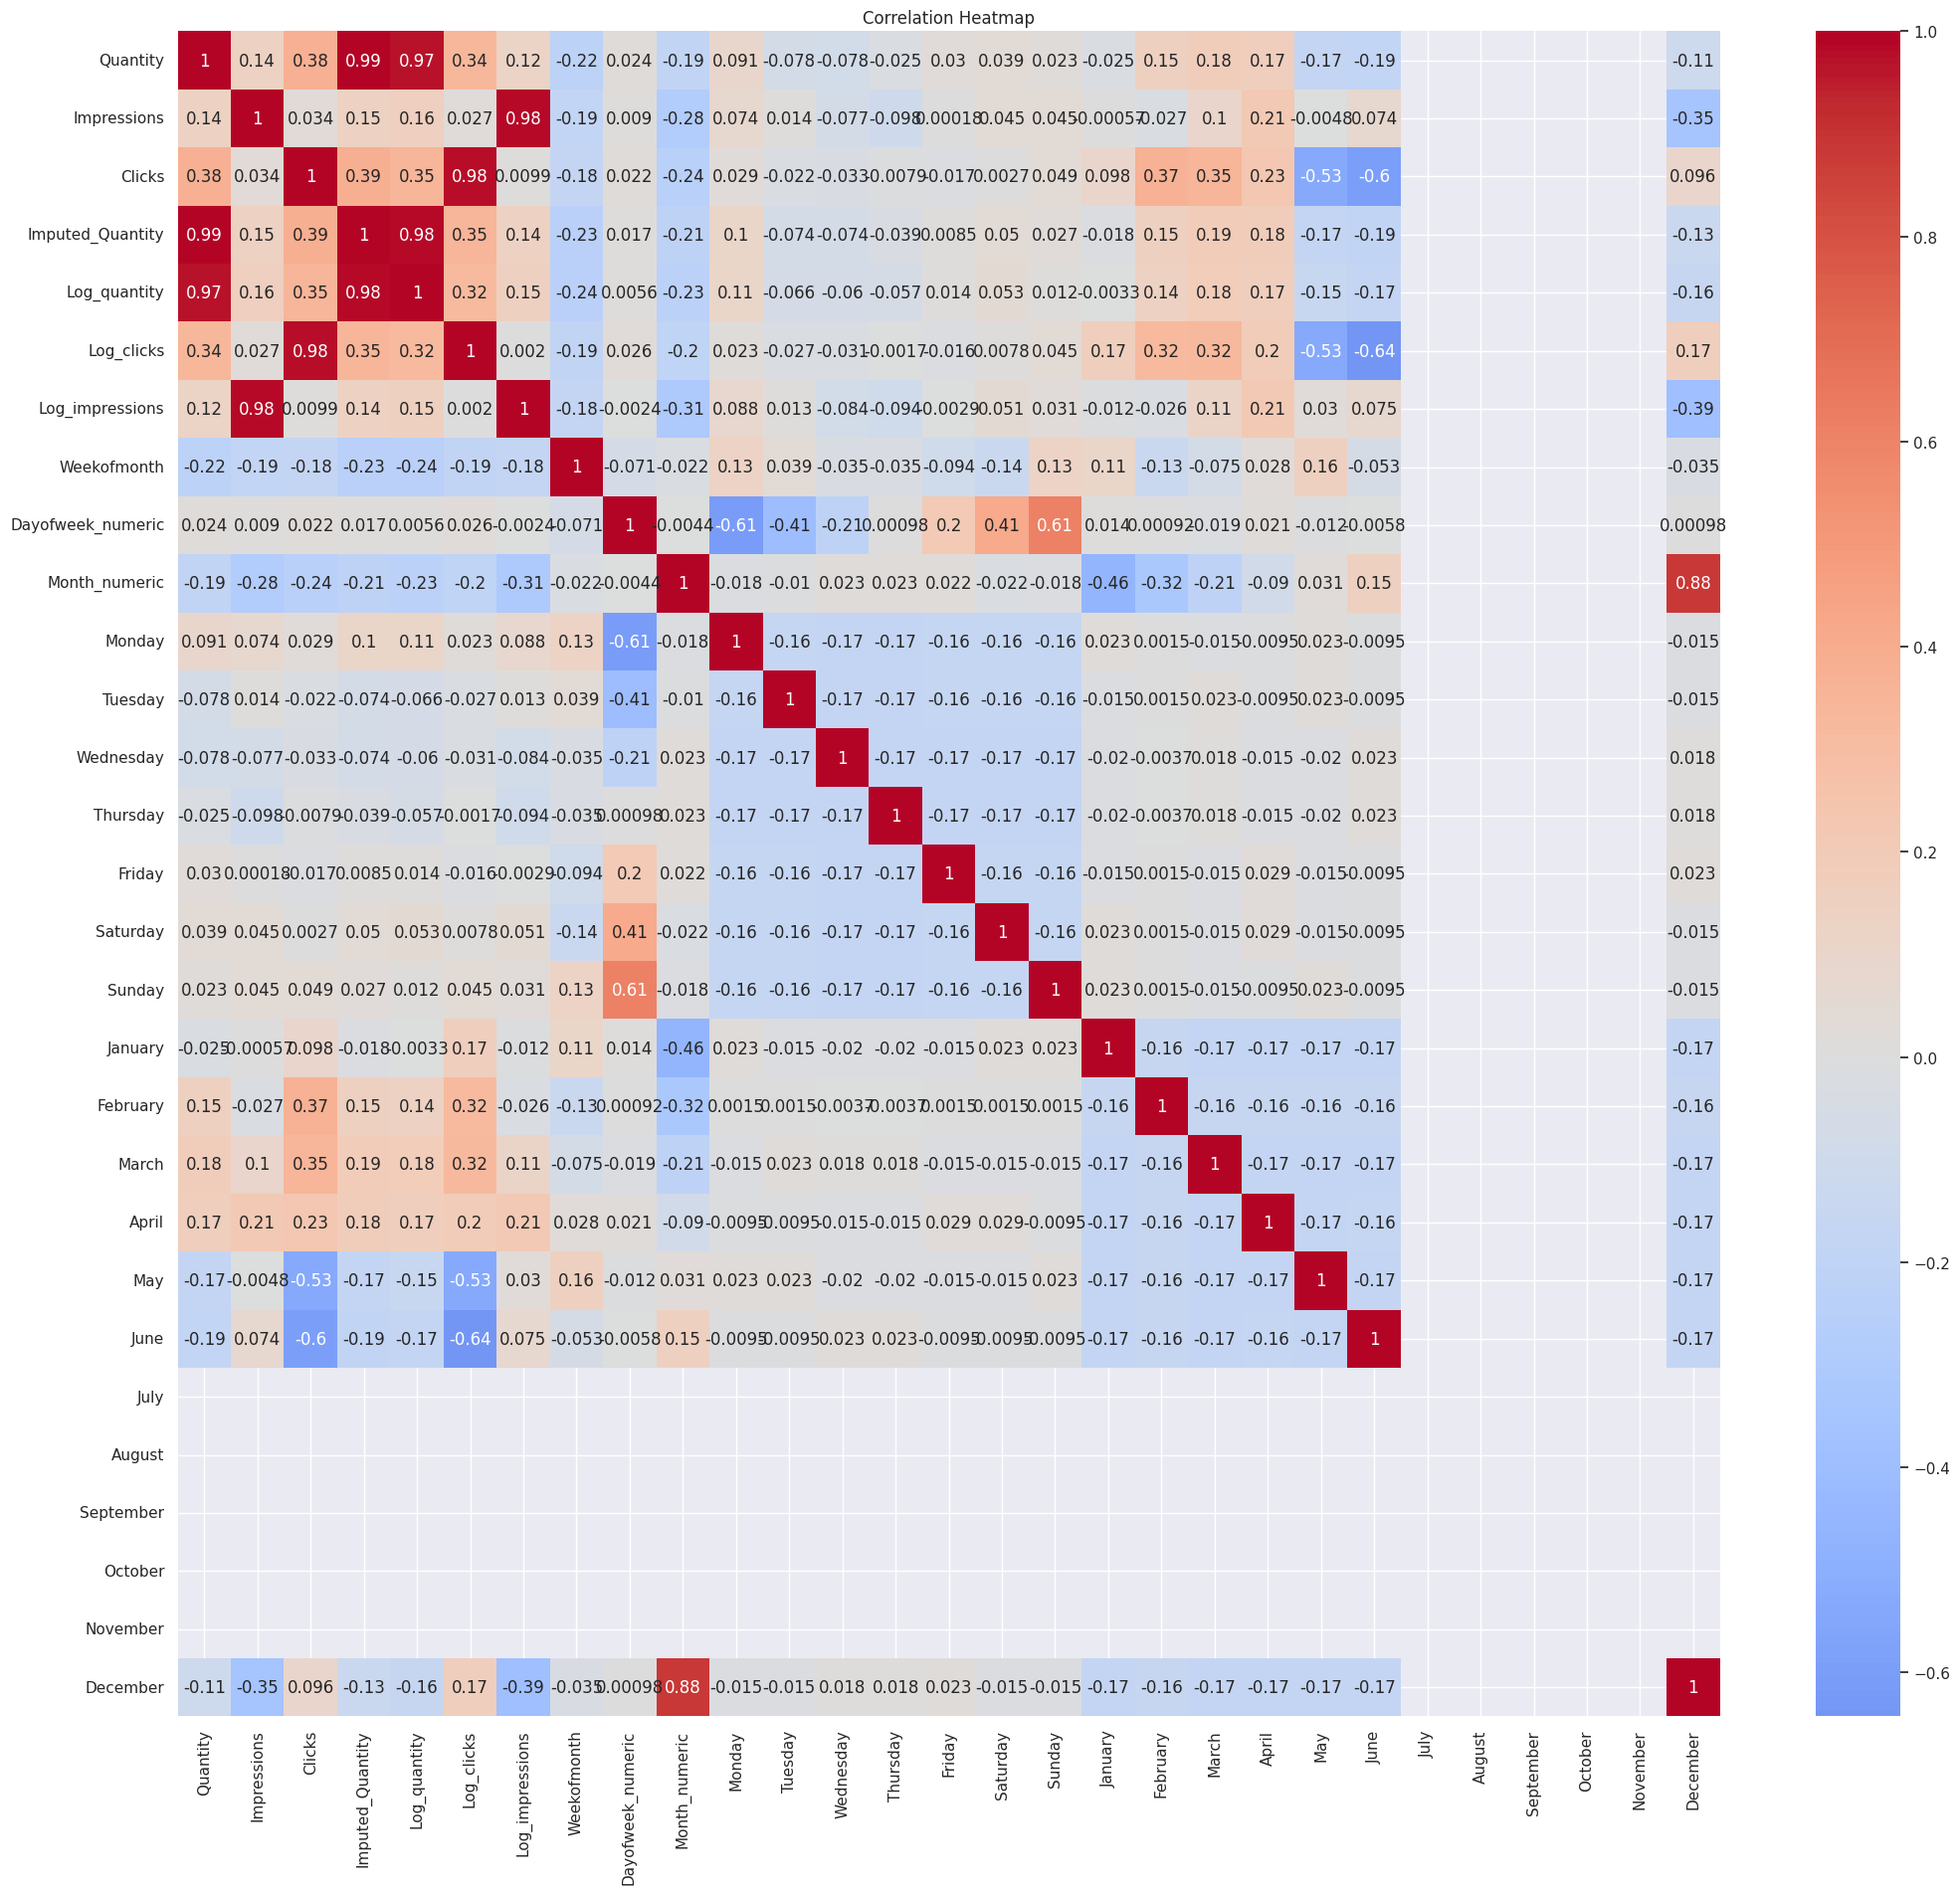

In [ ]:
# HEATMAP OF CORRELATION MATRIX OF ALL NUMERIC COLUMNS
plt.figure(figsize=(25, 22))
correlation_matrix = masterdata.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

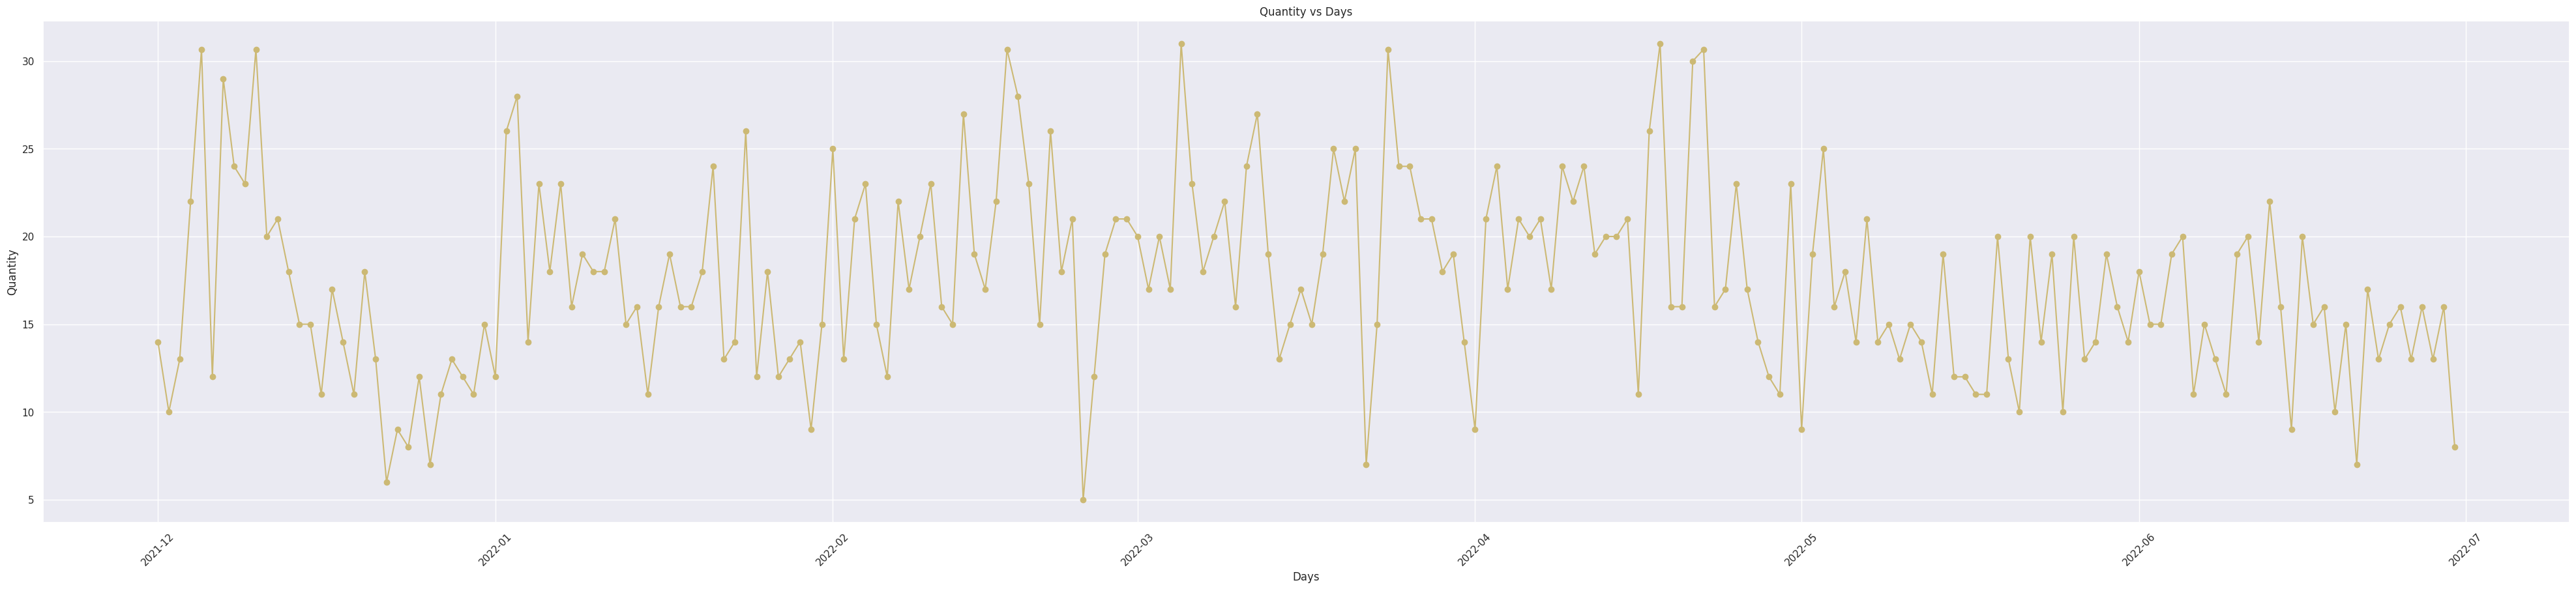

In [ ]:
# TIMESERIES PLOT OF IMPUTED_QUANTITY VS DAY_INDEX USING LINE GRAPH
plt.figure(figsize=(50, 10))
plt.plot(masterdata.index, masterdata['Imputed_Quantity'], marker='o', linestyle='-', color='y')
plt.xlabel('Days')
plt.ylabel('Quantity')
plt.title('Quantity vs Days')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


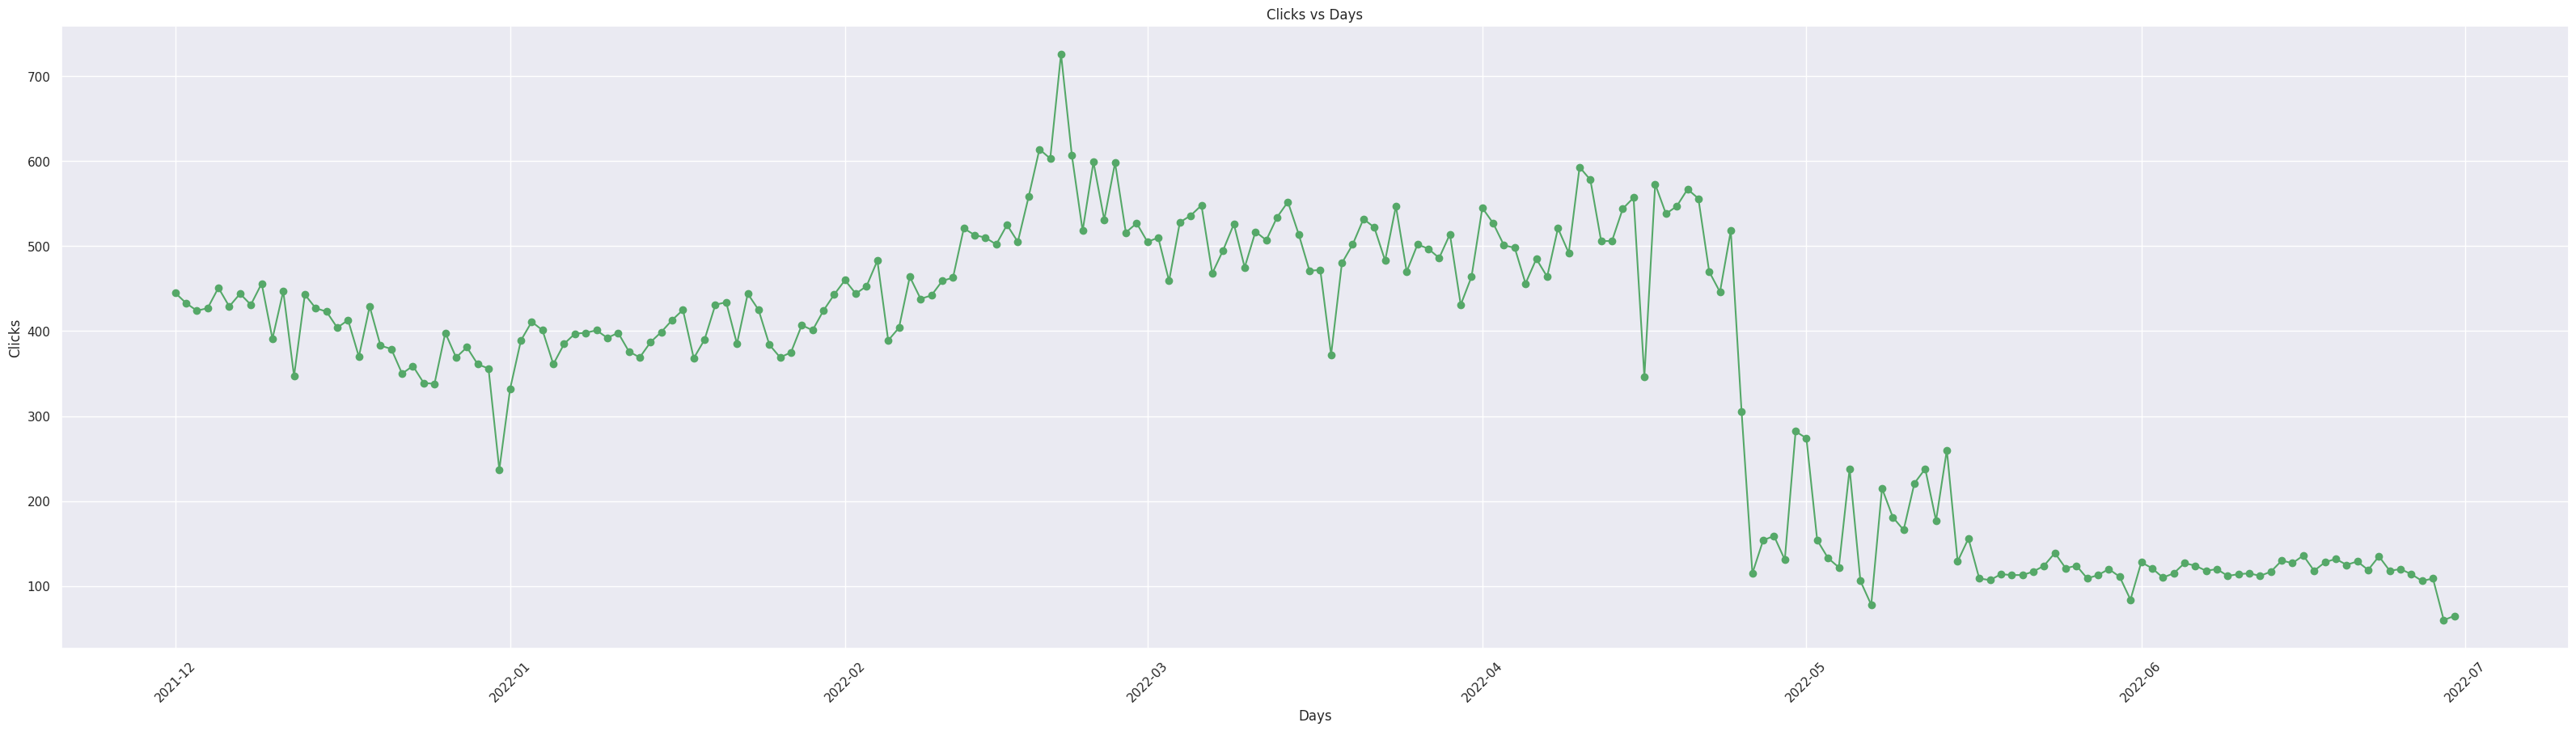

In [ ]:
# TIMESERIES PLOT OF CLICKS VS DAY_INDEX USING LINE GRAPH
plt.figure(figsize=(40, 10))
plt.plot(masterdata.index, masterdata['Clicks'], marker='o', linestyle='-', color='g')
plt.xlabel('Days')
plt.ylabel('Clicks')
plt.title('Clicks vs Days')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


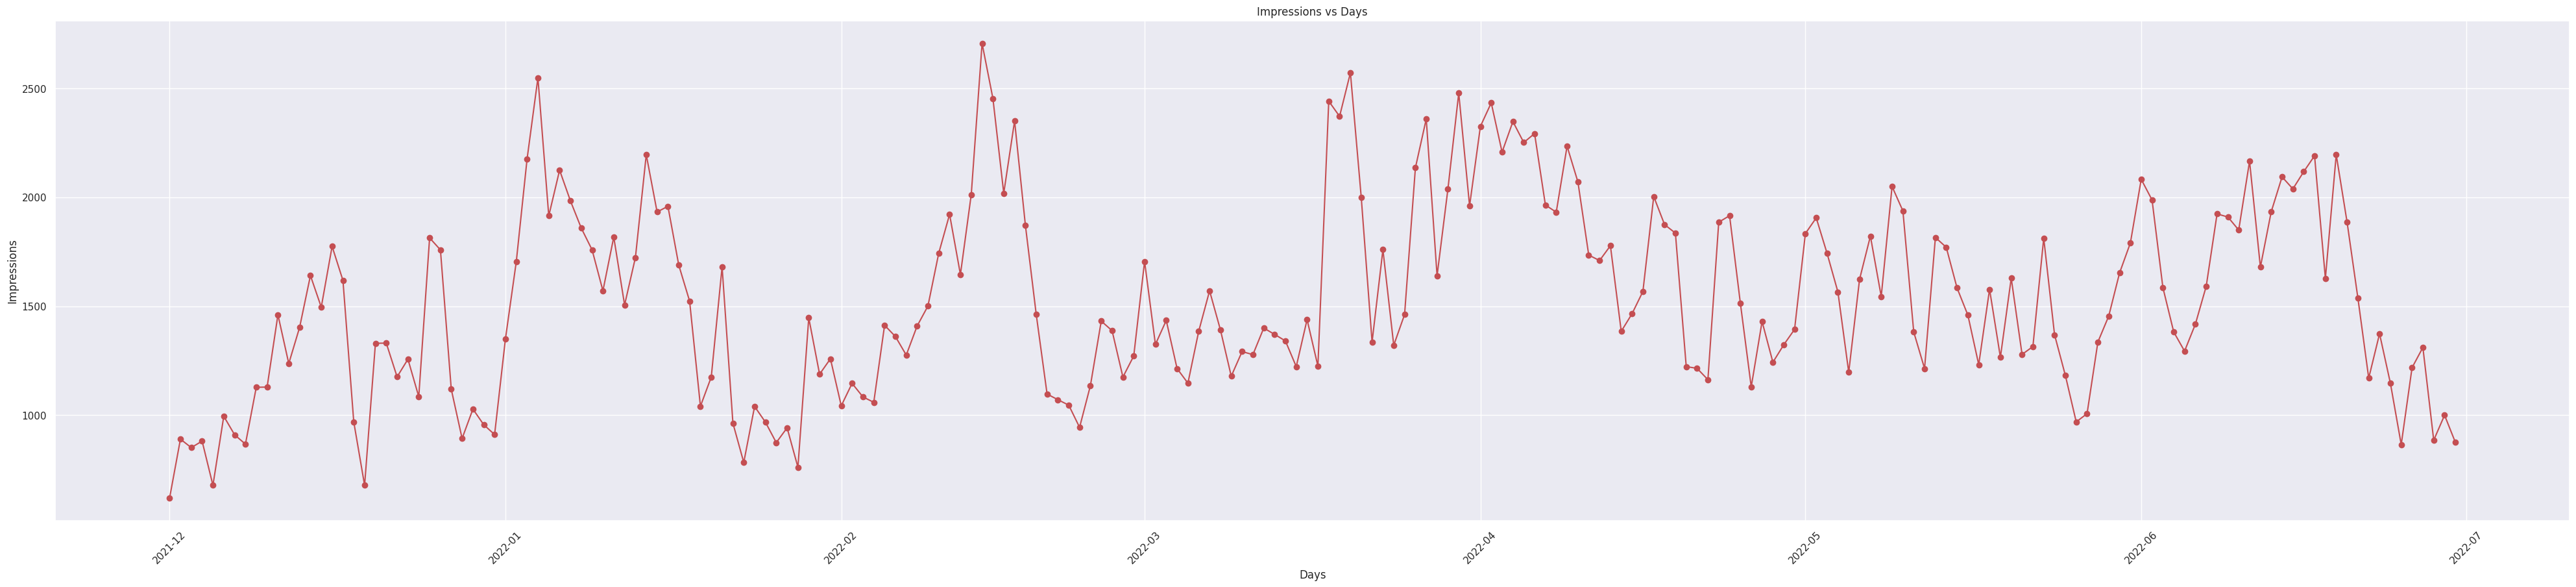

In [ ]:
# TIMESERIES PLOT OF IMPRESSIONS VS DAY_INDEX USING LINE GRAPH
plt.figure(figsize=(50, 10))
plt.plot(masterdata.index, masterdata['Impressions'], marker='o', linestyle='-', color='r')
plt.xlabel('Days')
plt.ylabel('Impressions')
plt.title('Impressions vs Days')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


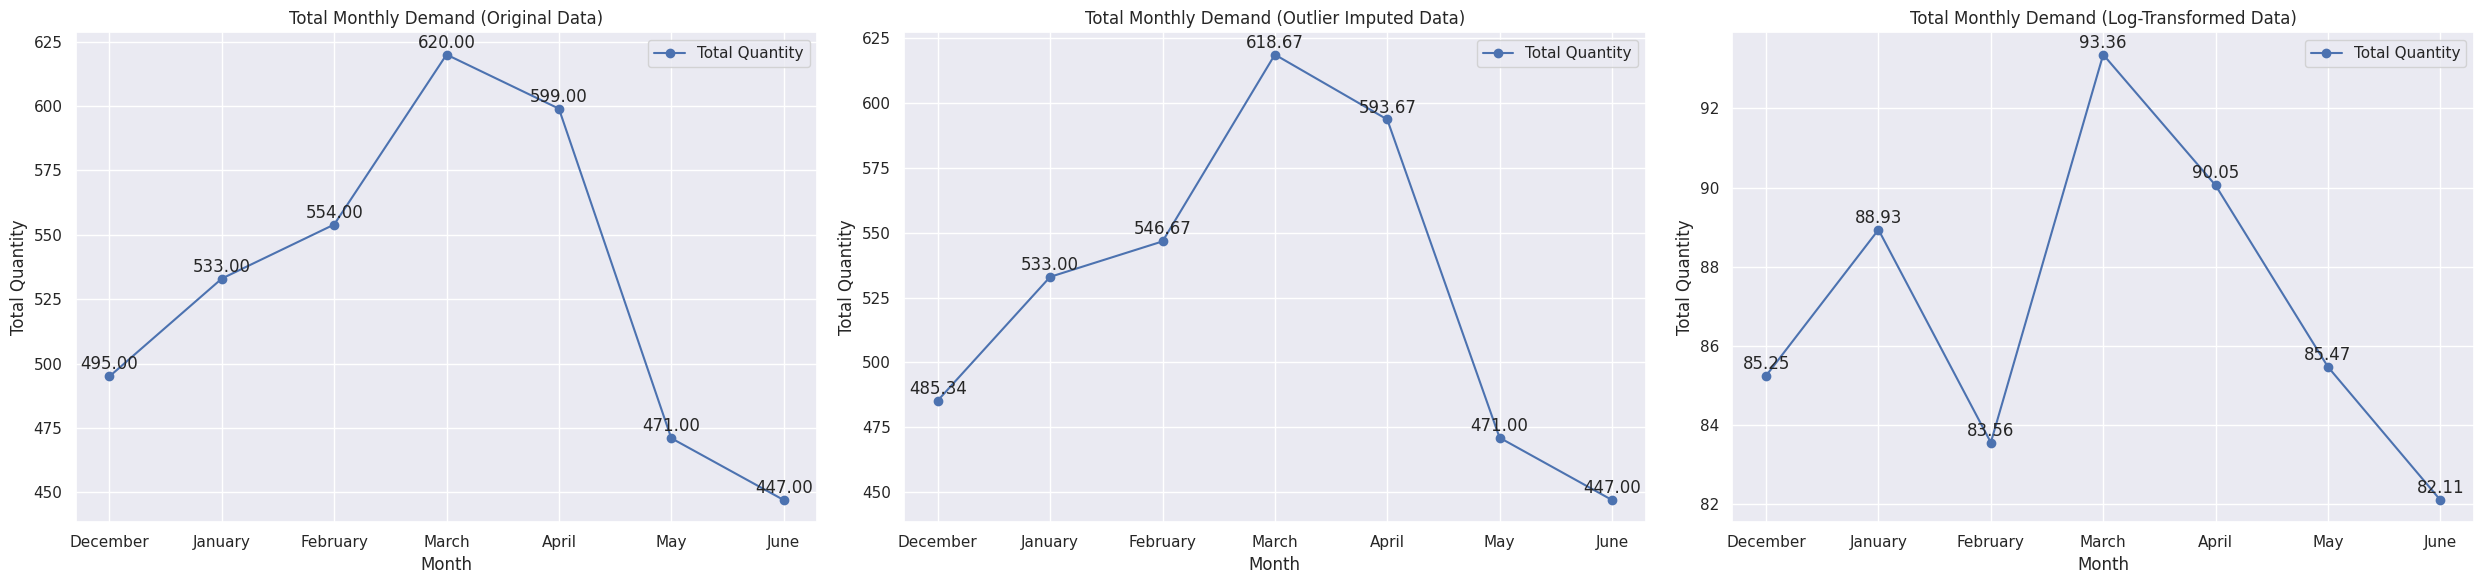

In [ ]:
# Function to annotate points on the plot with values
def annotate_points(ax, x, y, labels):
    for i, label in enumerate(labels):
        ax.annotate(f'{label:.2f}',  # Format to 2 decimal places
                    (x.iloc[i], y.iloc[i]),  # The position of the annotation
                    textcoords="offset points",  # Offsets the text to avoid overlap with points
                    xytext=(0, 5),  # Moves the annotation 5 points above the point
                    ha='center')  # Horizontally center the annotation text

# Define the function to plot the monthly demand
def plot_monthly_demand(df, x_col, y_col, title, ax):
    # Group by x_col (e.g., 'Monthname') and sum the y_col values (e.g., 'Quantity')
    df1 = df.groupby(x_col)[y_col].sum().reset_index()
    # Ensure the months are plotted only for those that exist in the dataset
    df1 = df1[df1[x_col].isin(df[x_col].unique())]
    # Reorder by the exact order of months in the dataset (the first occurrence of each month)
    df1 = df1.set_index(x_col).reindex(df[x_col].unique()).reset_index()
    # Plot the line for the given x_col (e.g., 'Monthname') vs y_col (e.g., 'Quantity')
    ax.plot(df1[x_col], df1[y_col], marker='o', color='b', label='Total Quantity')
    # Annotate points on the plot
    annotate_points(ax, df1[x_col], df1[y_col], df1[y_col])
    # Set the title of the plot
    ax.set_title(title)
    # Label the axes
    ax.set_xlabel('Month' if x_col == 'Monthname' else 'Week')
    ax.set_ylabel('Total Quantity')
    ax.grid(True)
    ax.legend()

# Main plotting function
def create_plots(masterdata):
    fig, axes = plt.subplots(1, 3, figsize=(25, 6))

    # Plot each graph for the respective data columns and titles
    plot_monthly_demand(masterdata, 'Monthname', 'Quantity', 'Total Monthly Demand (Original Data)', axes[0])
    plot_monthly_demand(masterdata, 'Monthname', 'Imputed_Quantity', 'Total Monthly Demand (Outlier Imputed Data)', axes[1])
    plot_monthly_demand(masterdata, 'Monthname', 'Log_quantity', 'Total Monthly Demand (Log-Transformed Data)', axes[2])

    # Adjust the layout and show the plot
    plt.tight_layout()
    plt.show()

create_plots(masterdata)


*  QUANTITY DEMAND INCREASES IN WINTER.
*  PEAK1 IN MARCH.
*  PEAK2 IN APRIL.


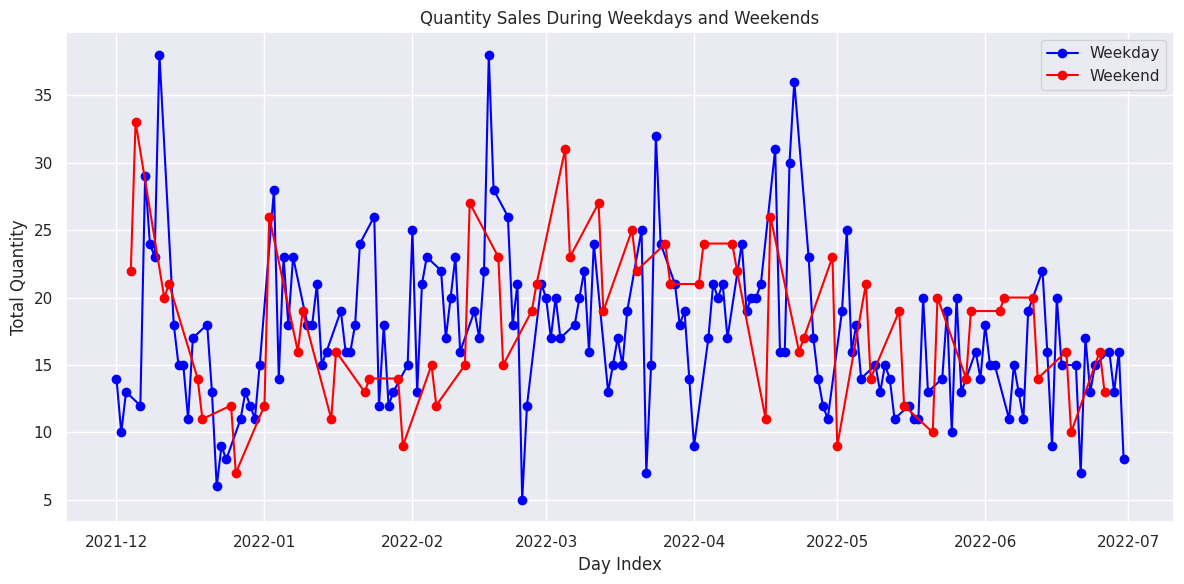

In [ ]:
# Function to plot Quantity sales for weekdays and weekends
def plot_weekday_vs_weekend(df, quantity_col, day_col):
    # Define weekdays and weekends
    weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
    weekends = ['Saturday', 'Sunday']

    # Add a 'Category' column to classify days as weekdays or weekends
    df['Category'] = df[day_col].apply(lambda x: 'Weekday' if x in weekdays else 'Weekend')

    # Reset the index if 'Day Index' is part of the index
    if 'Day Index' not in df.columns:
        df_reset = df.reset_index()
    else:
        df_reset = df.copy()

    # Aggregate data by 'Day Index' and 'Category'
    df_aggregated = df_reset.groupby(['Day Index', 'Category'])[quantity_col].sum().reset_index()

    # Separate data for plotting
    weekday_data = df_aggregated[df_aggregated['Category'] == 'Weekday']
    weekend_data = df_aggregated[df_aggregated['Category'] == 'Weekend']

    # Create the plot
    plt.figure(figsize=(12, 6))

    # Plot weekdays and weekends
    plt.plot(weekday_data['Day Index'], weekday_data[quantity_col], marker='o', linestyle='-', color='blue', label='Weekday')
    plt.plot(weekend_data['Day Index'], weekend_data[quantity_col], marker='o', linestyle='-', color='red', label='Weekend')

    # Add labels, title, and legend
    plt.title('Quantity Sales During Weekdays and Weekends')
    plt.xlabel('Day Index')
    plt.ylabel('Total Quantity')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Show the plot
    plt.show()

# Example usage:
# Assuming 'masterdata' has its index set to 'Day Index' and contains 'Dayofweek' and 'Quantity' columns
plot_weekday_vs_weekend(masterdata, 'Quantity', 'Dayofweek')




*   Higher variability in sales during weekends.



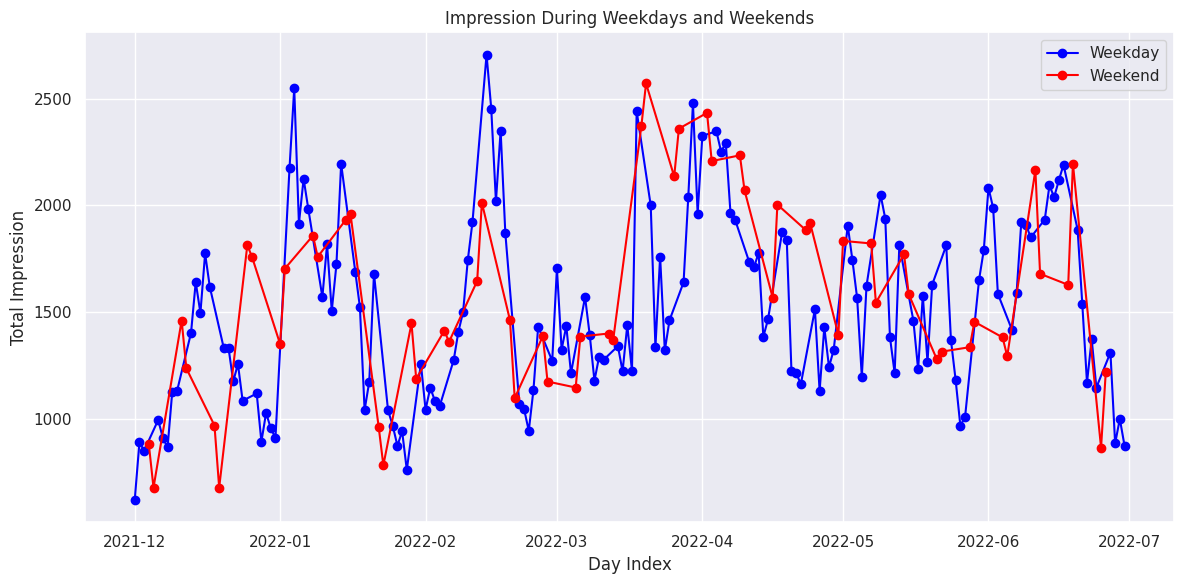

In [ ]:
# Function to plot Quantity sales for weekdays and weekends
def plot_weekday_vs_weekend(df, impression_col, day_col):
    # Define weekdays and weekends
    weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
    weekends = ['Saturday', 'Sunday']

    # Add a 'Category' column to classify days as weekdays or weekends
    df['Category'] = df[day_col].apply(lambda x: 'Weekday' if x in weekdays else 'Weekend')

    # Reset the index if 'Day Index' is part of the index
    if 'Day Index' not in df.columns:
        df_reset = df.reset_index()
    else:
        df_reset = df.copy()

    # Aggregate data by 'Day Index' and 'Category'
    df_aggregated = df_reset.groupby(['Day Index', 'Category'])[impression_col].sum().reset_index()

    # Separate data for plotting
    weekday_data = df_aggregated[df_aggregated['Category'] == 'Weekday']
    weekend_data = df_aggregated[df_aggregated['Category'] == 'Weekend']

    # Create the plot
    plt.figure(figsize=(12, 6))

    # Plot weekdays and weekends
    plt.plot(weekday_data['Day Index'], weekday_data[impression_col], marker='o', linestyle='-', color='blue', label='Weekday')
    plt.plot(weekend_data['Day Index'], weekend_data[impression_col], marker='o', linestyle='-', color='red', label='Weekend')

    # Add labels, title, and legend
    plt.title('Impression During Weekdays and Weekends')
    plt.xlabel('Day Index')
    plt.ylabel('Total Impression')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Show the plot
    plt.show()

# Example usage:
# Assuming 'masterdata' has its index set to 'Day Index' and contains 'Dayofweek' and 'Quantity' columns
plot_weekday_vs_weekend(masterdata, 'Impressions', 'Dayofweek')


*   Overall impressions higher during weekdays.



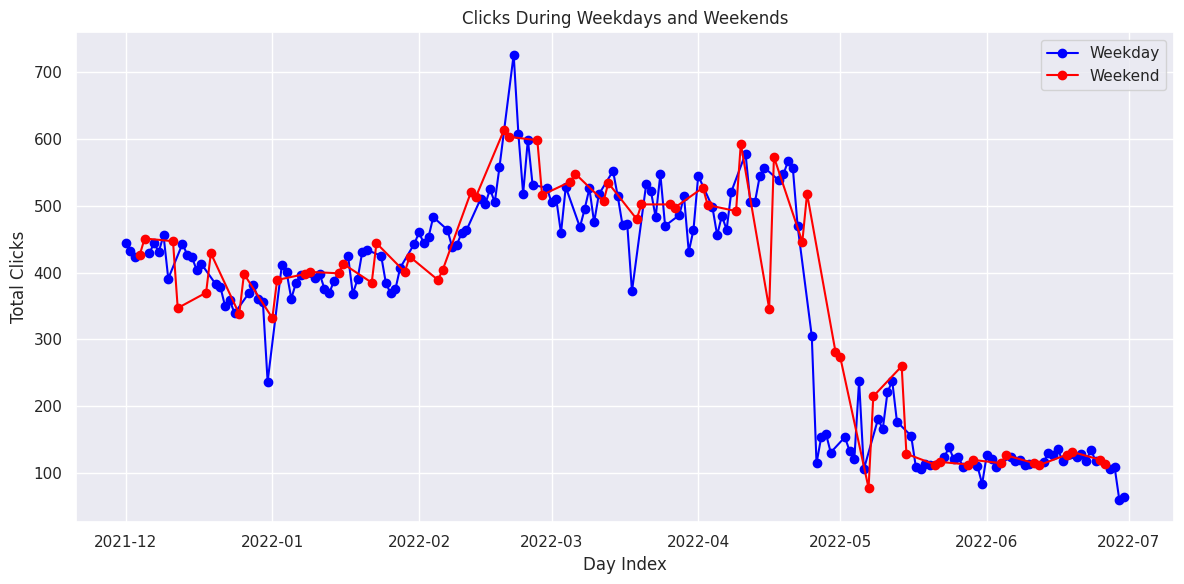

In [ ]:
# Function to plot Quantity sales for weekdays and weekends
def plot_weekday_vs_weekend(df, clicks_col, day_col):
    # Define weekdays and weekends
    weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
    weekends = ['Saturday', 'Sunday']

    # Add a 'Category' column to classify days as weekdays or weekends
    df['Category'] = df[day_col].apply(lambda x: 'Weekday' if x in weekdays else 'Weekend')

    # Reset the index if 'Day Index' is part of the index
    if 'Day Index' not in df.columns:
        df_reset = df.reset_index()
    else:
        df_reset = df.copy()

    # Aggregate data by 'Day Index' and 'Category'
    df_aggregated = df_reset.groupby(['Day Index', 'Category'])[clicks_col].sum().reset_index()

    # Separate data for plotting
    weekday_data = df_aggregated[df_aggregated['Category'] == 'Weekday']
    weekend_data = df_aggregated[df_aggregated['Category'] == 'Weekend']

    # Create the plot
    plt.figure(figsize=(12, 6))

    # Plot weekdays and weekends
    plt.plot(weekday_data['Day Index'], weekday_data[clicks_col], marker='o', linestyle='-', color='blue', label='Weekday')
    plt.plot(weekend_data['Day Index'], weekend_data[clicks_col], marker='o', linestyle='-', color='red', label='Weekend')

    # Add labels, title, and legend
    plt.title('Clicks During Weekdays and Weekends')
    plt.xlabel('Day Index')
    plt.ylabel('Total Clicks')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Show the plot
    plt.show()

# Example usage:
# Assuming 'masterdata' has its index set to 'Day Index' and contains 'Dayofweek' and 'Quantity' columns
plot_weekday_vs_weekend(masterdata, 'Clicks', 'Dayofweek')




*   Overall clicks higher during weekdays.


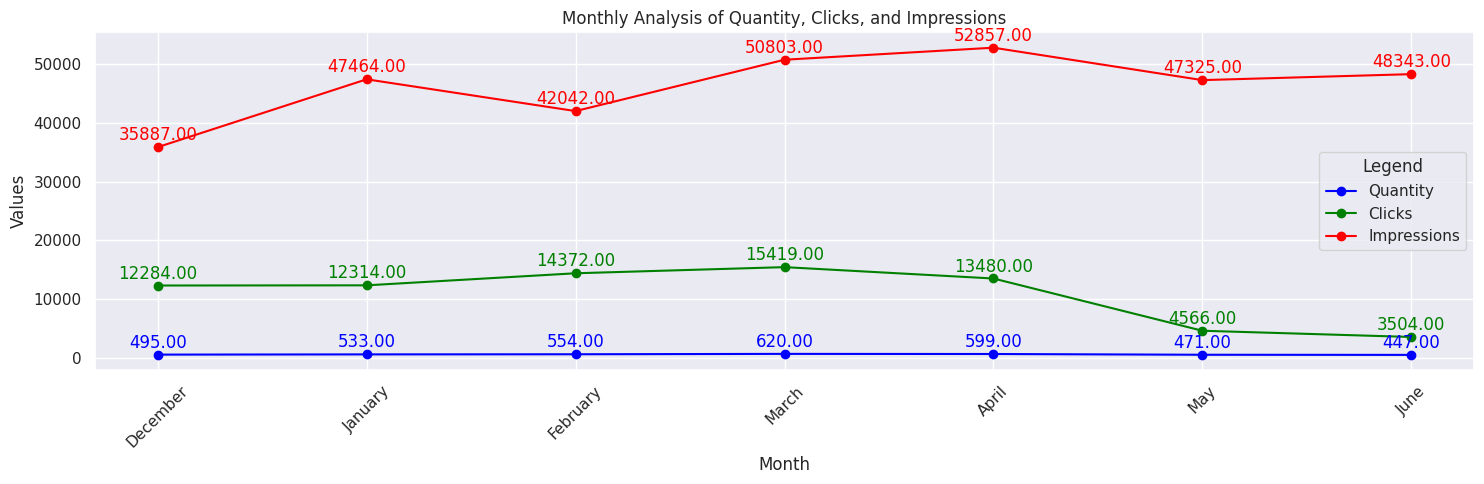

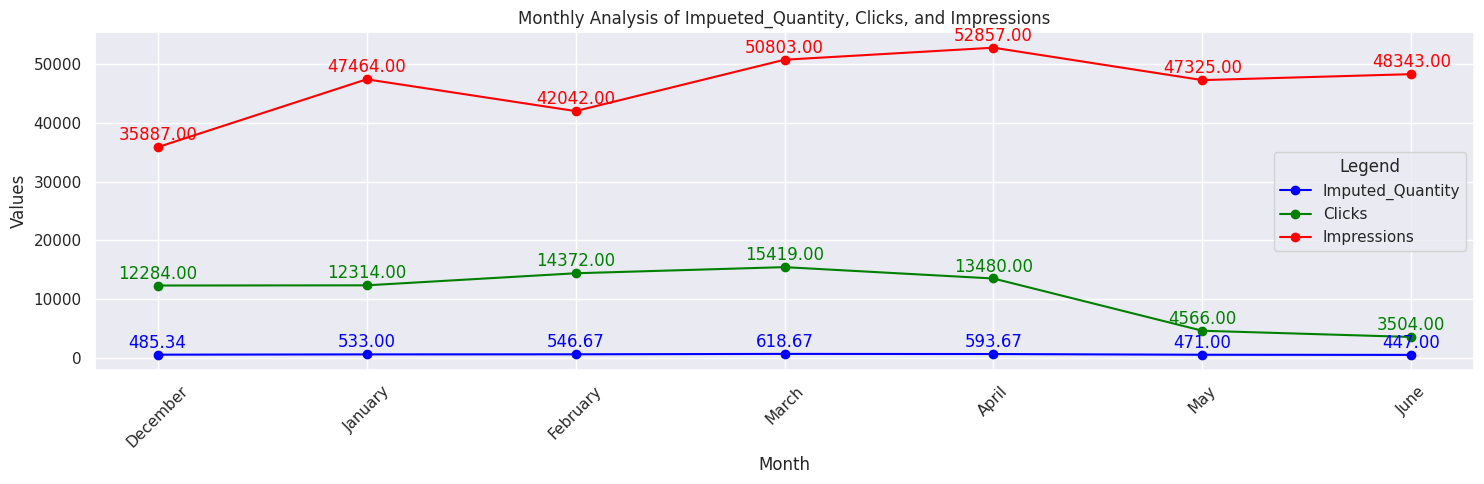

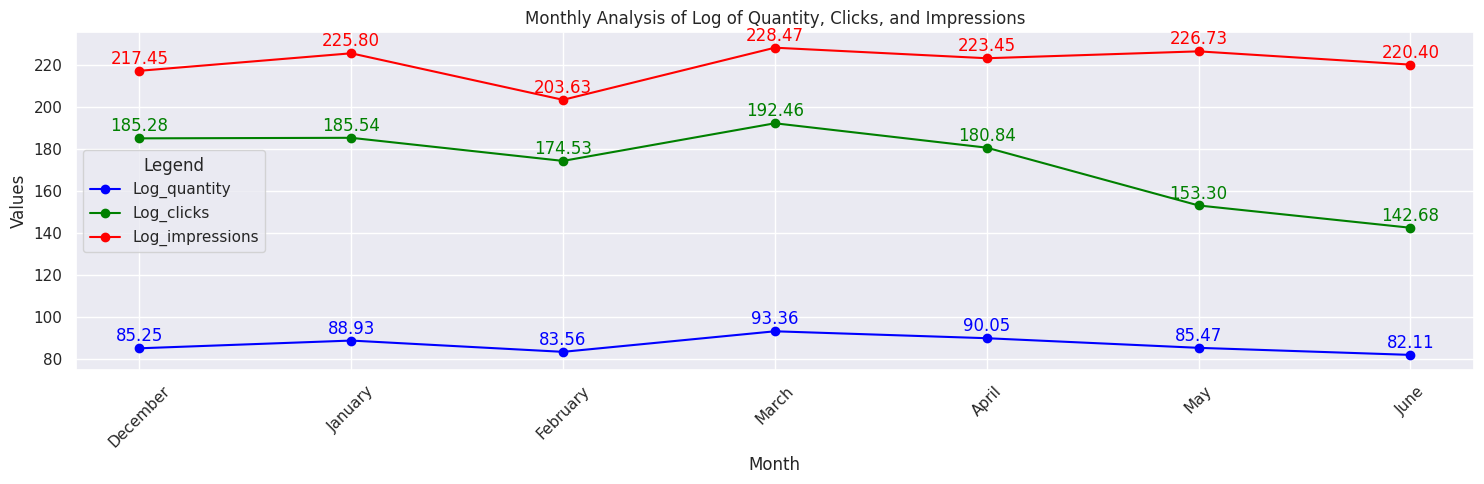

In [ ]:
# Function to plot the aggregated monthly data for multiple columns with annotations above the markers
def plot_aggregated_monthly(df, x_col, y_cols, colors, title):
    # Get the order of months as they appear in the dataset
    unique_months = df[x_col].unique()
    # Aggregating the data by the 'Monthname' and summing the columns
    # Explicitly set observed=False in the groupby method
    df_aggregated = df.groupby(x_col,observed =False)[y_cols].sum().reset_index()
    # Re-order the months according to the original order they appear in the dataset
    df_aggregated = df_aggregated.set_index(x_col).loc[unique_months].reset_index()
    # Create the plot
    plt.figure(figsize=(15, 5))
    # Plot each of the y_cols against x_col
    for i, y_col in enumerate(y_cols):
        # Plotting the line
        plt.plot(df_aggregated[x_col], df_aggregated[y_col], marker='o', linestyle='-', color=colors[i], label=y_col)
        # Annotate each point above the marker
        for j, value in enumerate(df_aggregated[y_col]):
            plt.annotate(f'{value:.2f}',  # Format the value to two decimal places
                         (df_aggregated[x_col].iloc[j], value),  # Position of the annotation
                         textcoords="offset points",  # Position relative to the point
                         xytext=(0, 5),  # Offset the text a bit above the marker
                         ha='center',  # Horizontally align the text in the center
                         color=colors[i])  # Use the same color for the annotation as the line
    plt.title(title)
    plt.xlabel('Month')
    plt.ylabel('Values')
    plt.legend(title='Legend')
    plt.xticks(ticks=range(len(df_aggregated[x_col])), labels=df_aggregated[x_col], rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot 1: Analysis of 'Quantity', 'Clicks', and 'Impressions' for months in the dataset
plot_aggregated_monthly(masterdata,'Monthname',['Quantity', 'Clicks', 'Impressions'],['blue', 'green', 'red'],
    'Monthly Analysis of Quantity, Clicks, and Impressions'
)
# Plot 2: Analysis of 'Imputed_Quantity', 'Clicks', and 'Impressions' for months in the dataset
plot_aggregated_monthly(masterdata,'Monthname',['Imputed_Quantity', 'Clicks', 'Impressions'],['blue', 'green', 'red'],
    'Monthly Analysis of Impueted_Quantity, Clicks, and Impressions'
)

# Plot 3: Analysis of 'Log_quantity', 'Log_clicks', and 'Log_impressions' for months in the dataset
plot_aggregated_monthly(masterdata,'Monthname',['Log_quantity', 'Log_clicks', 'Log_impressions'],['blue', 'green', 'red'],
                        'Monthly Analysis of Log of Quantity, Clicks, and Impressions'
)


*  IN THE THREE PLOTS CLICKS AND QUANTITY PEAKS IN MARCH.

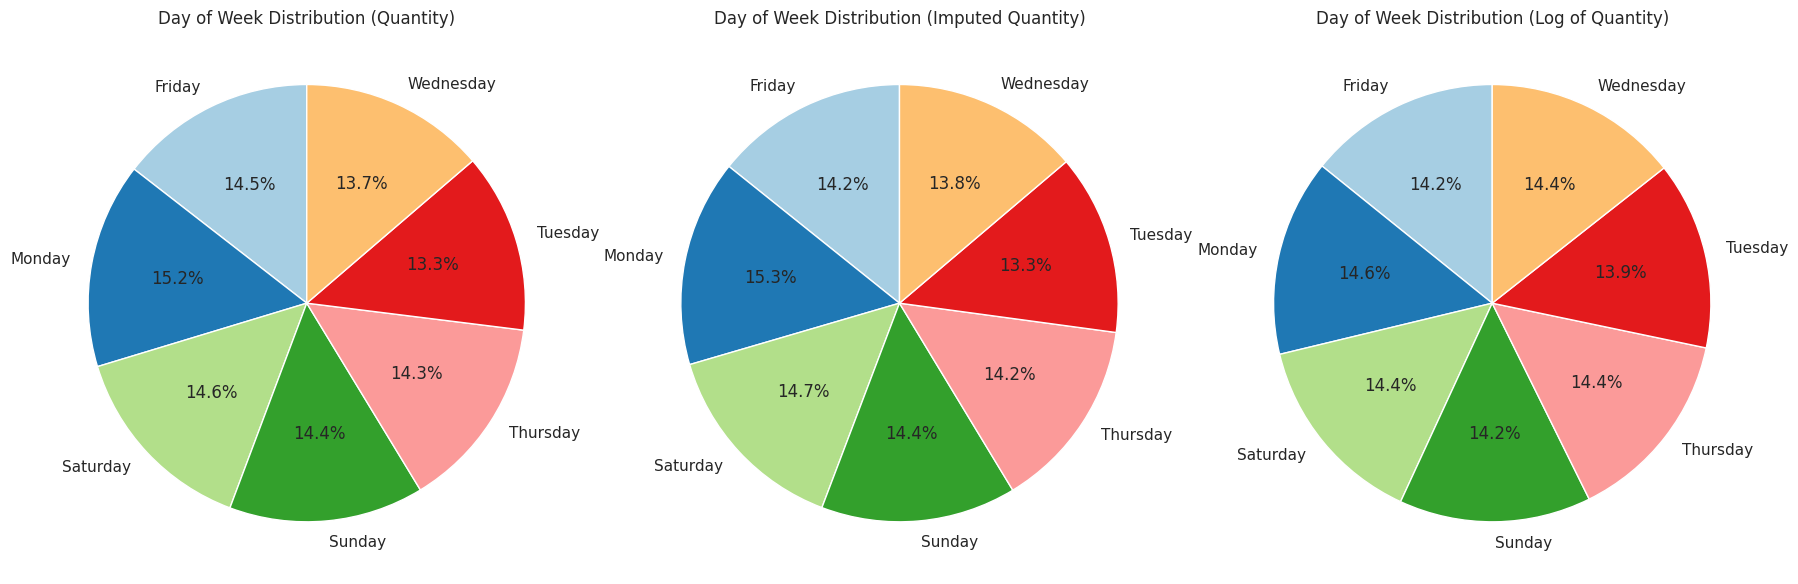

In [ ]:

# Define the function to create pie charts for each of the specified columns
def plot_dayofweek_pie(df, y_col, title, ax):
    # Group by 'dayofweek' and sum the values of the specified y_col
    df_grouped = df.groupby('Dayofweek')[y_col].sum()
    # Plot the pie chart for the given y_col (e.g., 'Quantity', 'Imputed_Quantity', 'Log_Quantity')
    ax.pie(df_grouped, labels=df_grouped.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    # Set title and ensure the pie chart is circular
    ax.set_title(title)
    ax.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
# Create subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
# Plot each pie chart for the respective columns and titles
plot_dayofweek_pie(masterdata, 'Quantity', 'Day of Week Distribution (Quantity)', axes[0])
plot_dayofweek_pie(masterdata, 'Imputed_Quantity', 'Day of Week Distribution (Imputed Quantity)', axes[1])
plot_dayofweek_pie(masterdata, 'Log_quantity', 'Day of Week Distribution (Log of Quantity)', axes[2])
# Adjust the layout and show the plot
plt.tight_layout()
plt.show()


*   IN ALL THREE PIE CHARTS SALES QUANTITY IN MAX ON MONDAY.   
*   IN ALL THREE PIE CHARTS SALES QUANTITY IN LEAST ON TUESDAY.


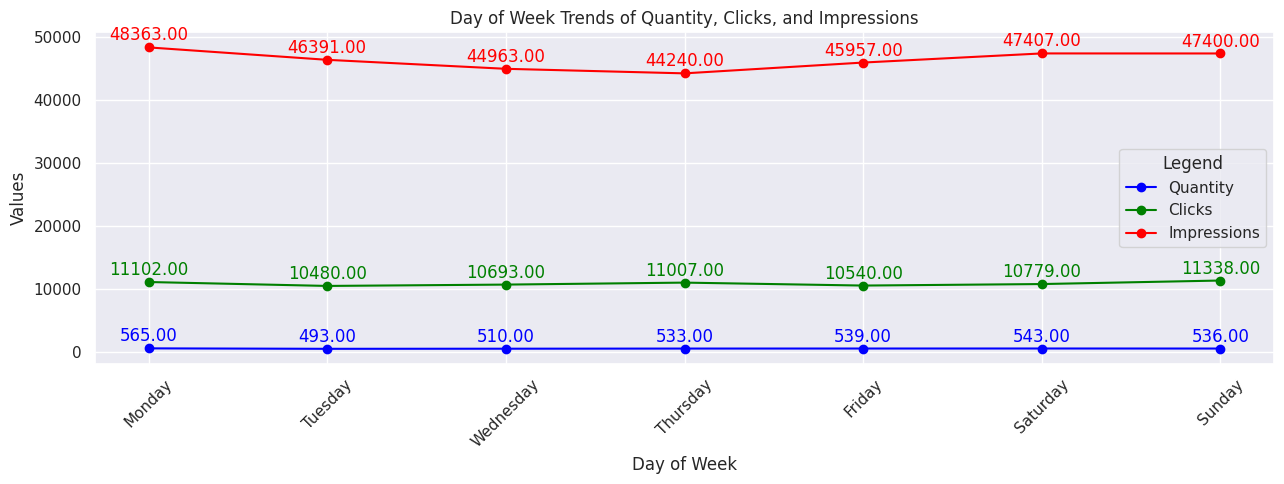

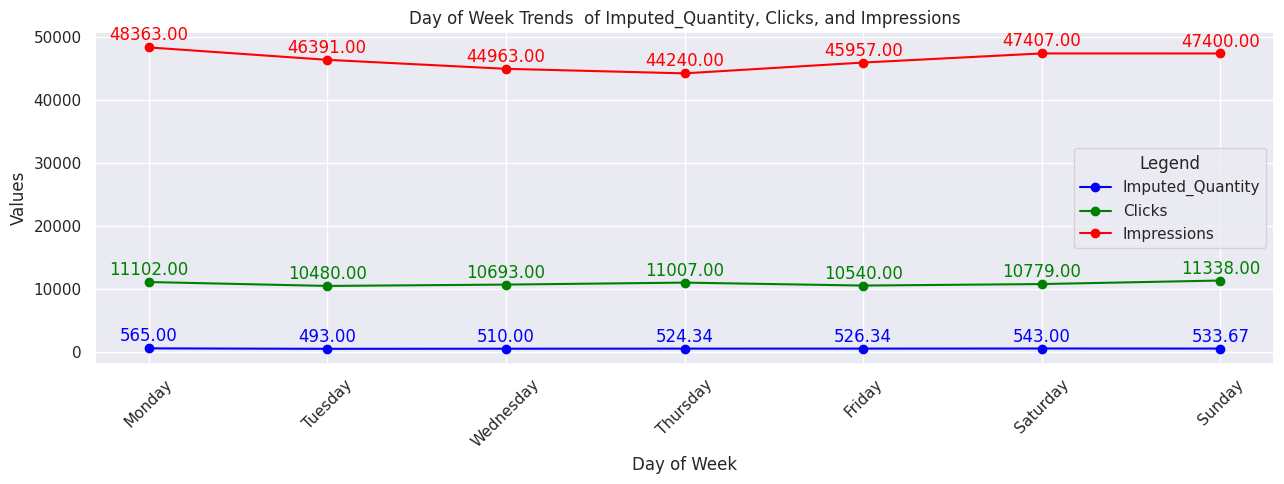

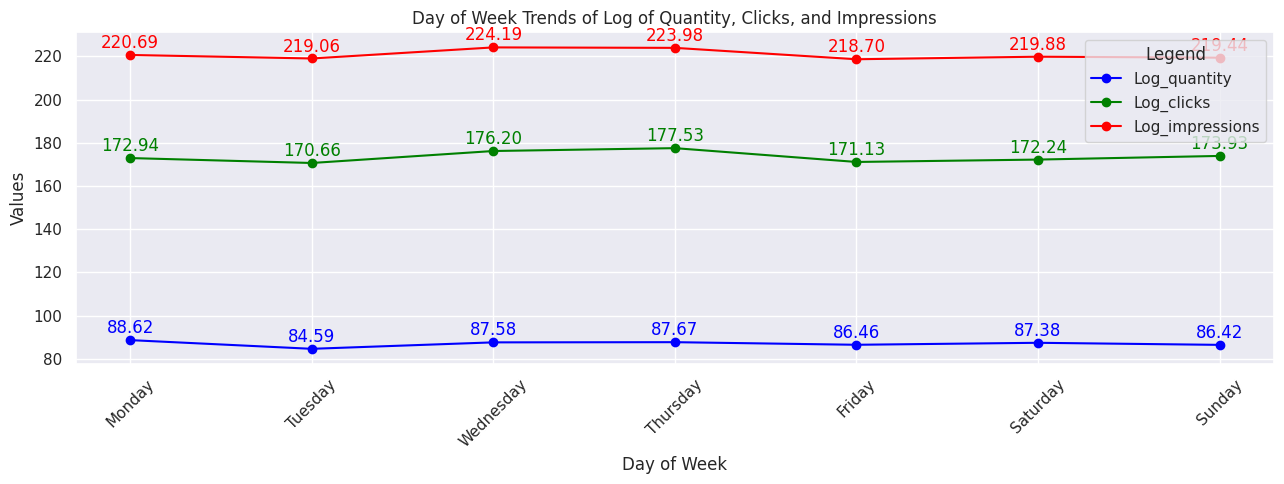

In [ ]:
# Function to plot the aggregated data for each day of the week
def plot_aggregated_day(df, x_col, y_cols, colors, title):
    # Get the standard order of days (Monday=0, Sunday=6)
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    # Convert 'Dayofweek' to the appropriate string labels if it's numeric
    if df[x_col].dtype == 'int64':
        df[x_col] = df[x_col].apply(lambda x: day_order[x])
    # Aggregating the data by 'Dayofweek' and summing the columns
    df_aggregated = df.groupby(x_col, observed=False)[y_cols].sum().reset_index()
    # Re-order the days to match the standard day order (Monday to Sunday)
    df_aggregated = df_aggregated.set_index(x_col).reindex(day_order).reset_index()
    # Create the plot
    plt.figure(figsize=(13, 5))
    # Plot each of the y_cols against x_col
    for i, y_col in enumerate(y_cols):
        # Plotting the line
        plt.plot(df_aggregated[x_col], df_aggregated[y_col], marker='o', linestyle='-', color=colors[i], label=y_col)
        # Annotate each point above the marker
        for j, value in enumerate(df_aggregated[y_col]):
            plt.annotate(f'{value:.2f}',  # Format the value to two decimal places
                         (df_aggregated[x_col].iloc[j], value),  # Position of the annotation
                         textcoords="offset points",  # Position relative to the point
                         xytext=(0, 5),  # Offset the text a bit above the marker
                         ha='center',  # Horizontally align the text in the center
                         color=colors[i])  # Use the same color for the annotation as the line
    plt.title(title)
    plt.xlabel('Day of Week')
    plt.ylabel('Values')
    plt.legend(title='Legend')
    # Reorder the x-ticks for correct day of the week display
    plt.xticks(ticks=range(len(df_aggregated[x_col])), labels=df_aggregated[x_col], rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
# Plot 1: Analysis of 'Quantity', 'Clicks', and 'Impressions' for days of the week
plot_aggregated_day(masterdata,'Dayofweek',['Quantity', 'Clicks', 'Impressions'],['blue', 'green', 'red'],'Day of Week Trends of Quantity, Clicks, and Impressions')

# Plot 2: Analysis of 'Imputed_Quantity', 'Clicks', and 'Impressions' for DAYS in the dataset
plot_aggregated_day(masterdata,'Dayofweek',['Imputed_Quantity', 'Clicks', 'Impressions'],['blue', 'green', 'red'], 'Day of Week Trends  of Imputed_Quantity, Clicks, and Impressions')
# Plot 3: Analysis of 'Log_quantity', 'Log_clicks', and 'Log_impressions' for days of the week
plot_aggregated_day(masterdata,'Dayofweek',['Log_quantity', 'Log_clicks', 'Log_impressions'],['blue', 'green', 'red'],'Day of Week Trends of Log of Quantity, Clicks, and Impressions')


*   SALES QUANTITY MAX ON MONDAY AND LEAST ON TUESAY.



In [ ]:
# Specify the path to save the file
file_path = '/content/drive/My Drive/infosys internship/Datasets/Feature_engineered_masterdata.xlsx'

# Save the DataFrame with the original index as a column in the Excel file
masterdata.to_excel(file_path, index=True)  # 'index=True' will save the index (Day Index) as a column
print(f"File saved to {file_path}")


File saved to /content/drive/My Drive/infosys internship/Datasets/Feature_engineered_masterdata.xlsx


WEEK 3 & 4
*******
Time Series Modelling

In [ ]:
masterdata=pd.read_excel(r'/content/drive/My Drive/infosys internship/Datasets/Feature_engineered_masterdata.xlsx')

STATIONARITY TEST-ADF

In [ ]:
# Function to check stationarity using Augmented Dickey-Fuller test
def check_stationarity(series):
    result = adfuller(series.dropna())
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    return result[1] < 0.05  # If p-value < 0.05, it's stationary

# Check for stationarity of the 'imputed_quantity' column
is_stationary = check_stationarity(masterdata['Imputed_Quantity'])
if not is_stationary:
    print("The series is non-stationary. Consider differencing or other transformations.")


ADF Statistic: -4.372460988868509
p-value: 0.00033197524263678396




*   Staionary series as p-value less than 0.05


In [ ]:
# Assuming your 'Day Index' column is in the masterdata DataFrame
# Ensure that 'Day Index' is a datetime object
masterdata['Day Index'] = pd.to_datetime(masterdata['Day Index'], errors='coerce')

# Ensure the 'Day Index' column is set as the index for resampling purposes
masterdata.set_index('Day Index', inplace=True)

In [ ]:
# Assuming 'masterdata' is the main DataFrame with the necessary columns
train_size = int(0.7 * len(masterdata))

# Define the train and test datasets for the target (dependent variable)
train = masterdata['Imputed_Quantity'][:train_size]  # Added train_target
test = masterdata['Imputed_Quantity'][train_size:]

# Define the train and test datasets for the exogenous variables (independent variables)
train_exog = masterdata[['Impressions', 'Clicks','Month_numeric','Weekofmonth','Monday','Tuesday','Wednesday','Thursday','Friday','January','February','March','April','May','June','July','August','September','October','November','December']][:train_size]
test_exog = masterdata[['Impressions', 'Clicks','Month_numeric','Weekofmonth','Monday','Tuesday','Wednesday','Thursday','Friday','January','February','March','April','May','June','July','August','September','October','November','December']][train_size:]


In [ ]:
# Helper function to calculate evaluation metrics
def calculate_metrics(true_values, predicted_values):
    mae = mean_absolute_error(true_values, predicted_values)
    rmse = np.sqrt(mean_squared_error(true_values, predicted_values))
    mse = mean_squared_error(true_values, predicted_values)
    mape = np.mean(np.abs((true_values - predicted_values) / true_values)) * 100
    return mae, rmse, mse, mape


In [ ]:
import matplotlib.pyplot as plt

def plot_model_predictions(true_values, predicted_values, model_name):

    # Make sure the Day Index is set as the index in masterdata
    plt.figure(figsize=(10, 6))

    # Plot true values and predicted values, using 'Day Index' (which is the index now)
    plt.plot(true_values.index, true_values, label='True values')
    plt.plot(true_values.index, predicted_values, label=f'{model_name} Predictions', color='orange')

    # Labeling the axes
    plt.xlabel("Day Index")  # Label the x-axis
    plt.ylabel("Imputed Quantity")  # Label the y-axis
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

    # Adding the legend and title
    plt.legend()
    plt.title(f'{model_name} Model Predictions')

    # Display the plot
    plt.show()


In [ ]:
# Function to plot residuals
def plot_residuals(model_fit, model_name):
    residuals = model_fit.resid
    plt.figure(figsize=(10, 6))
    plt.plot(residuals, label='Residuals', color='purple')
    plt.axhline(0, linestyle='--', color='gray', linewidth=1)
    plt.title(f'Residual Plot for {model_name}')
    plt.legend()
    plt.show()


In [ ]:


def plot_weekly_comparison(true_values, predicted_values, model_name):

    # Resample the true values and predicted values by week and sum them
    true_weekly = true_values.resample('W').sum()
    predicted_weekly = pd.Series(predicted_values, index=true_values.index).resample('W').sum()

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(true_weekly.index, true_weekly, label='True Weekly Values', marker='o')
    plt.plot(predicted_weekly.index, predicted_weekly, label=f'{model_name} Weekly Predictions', marker='o', color='orange')

    # Labeling the axes
    plt.xlabel("Week")
    plt.ylabel("Sum of Imputed Quantity (Weekly)")
    plt.title(f'{model_name} Model Weekly Predictions')
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed for readability

    # Adding the legend
    plt.legend()

    # Display the plot
    plt.grid(visible=True, linestyle='--', alpha=0.6)
    plt.show()


AR MODEL

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


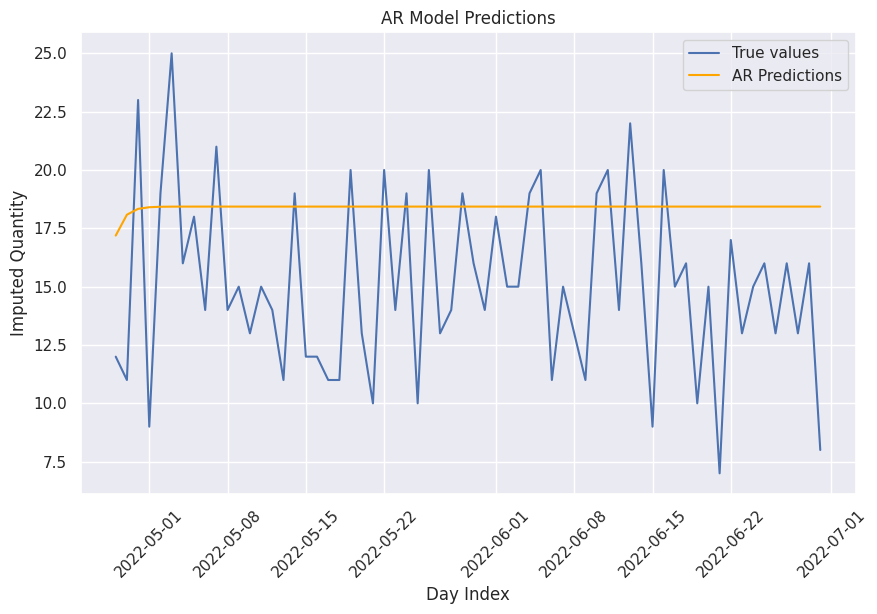

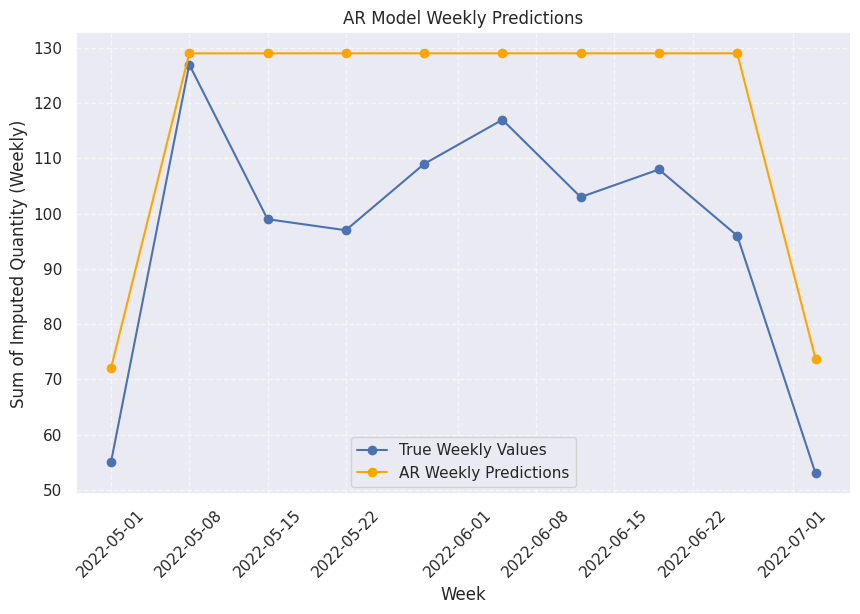

In [ ]:
ar_model = ARIMA(train, order=(1, 0, 0))
ar_model_fit = ar_model.fit()
ar_predictions = ar_model_fit.forecast(len(test))

# Plot and Evaluate AR Model
plot_model_predictions(test, ar_predictions, "AR")
ar_metrics = calculate_metrics(test, ar_predictions)
# AR Model Weekly Plot
# Remove the datetime_index argument
plot_weekly_comparison(test, ar_predictions, "AR")


*   Poor performance of model.

MA MODEL

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


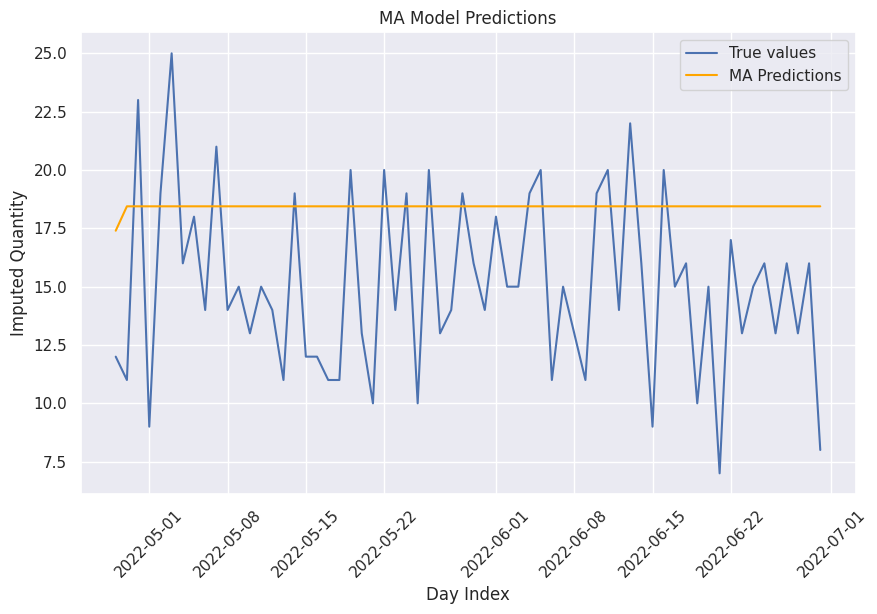

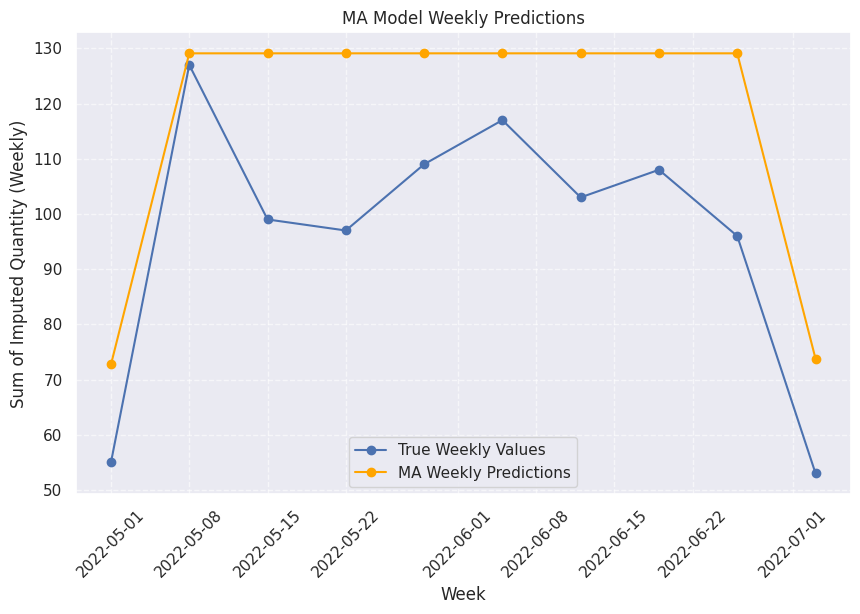

In [ ]:
ma_model = ARIMA(train, order=(0, 0, 1))
ma_model_fit = ma_model.fit()
ma_predictions = ma_model_fit.forecast(len(test))

# Plot and Evaluate MA Model
plot_model_predictions(test, ma_predictions, "MA")
ma_metrics = calculate_metrics(test, ma_predictions)
# AR Model Weekly Plot

plot_weekly_comparison(test, ma_predictions, "MA")

*   Poor performance of model.

ARIMA MODEL

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


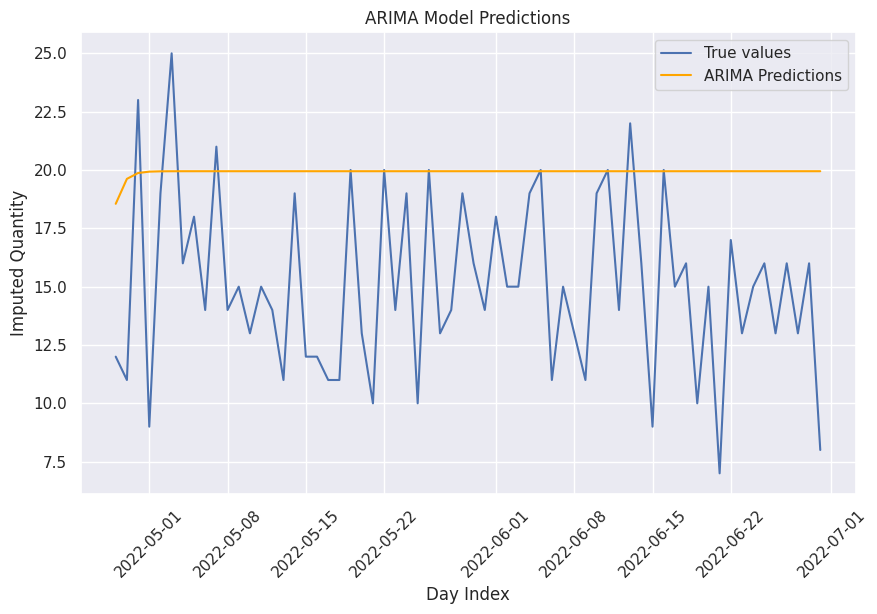

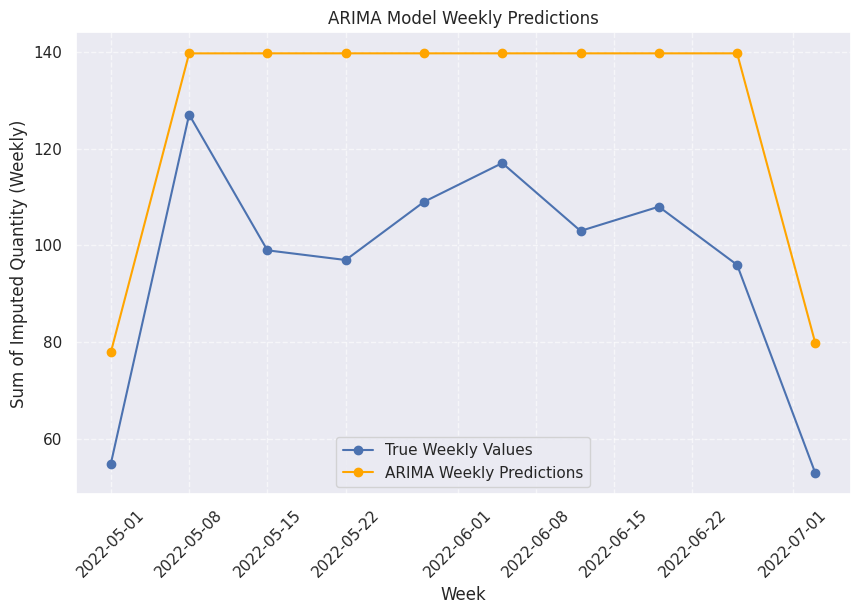

In [ ]:
arima_model = ARIMA(train, order=(1, 1, 1))
arima_model_fit = arima_model.fit()
arima_predictions = arima_model_fit.forecast(len(test))

# Plot and Evaluate ARIMA Model
plot_model_predictions(test, arima_predictions, "ARIMA")
arima_metrics = calculate_metrics(test, arima_predictions)
plot_weekly_comparison(test,arima_predictions, "ARIMA")

*   Poor performance of model.

In [ ]:
# ARIMA Hyperparameter Tuning
def objective_arima(trial):
    p = trial.suggest_int("p", 1, 5)
    d = trial.suggest_int("d", 0, 2)
    q = trial.suggest_int("q", 1, 5)

    # Fit ARIMA with trial parameters
    model = ARIMA(train, order=(p, d, q))
    model_fit = model.fit()
    predictions = model_fit.forecast(len(test))

    # Return RMSE as the objective metric
    return np.sqrt(mean_squared_error(test, predictions))

# Create Optuna study for ARIMA
study_arima = optuna.create_study(direction='minimize')
study_arima.optimize(objective_arima, n_trials=50)
best_arima_params = study_arima.best_params

# Print best ARIMA parameters
print("Best ARIMA Parameters:", best_arima_params)


[I 2024-12-02 11:24:57,172] A new study created in memory with name: no-name-b9aed5af-174f-4781-ba1d-d4ef8b65b30b
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
[I 2024-12-02 11:24:57,471] Trial 0 finished with value: 5.738156961374327 and parameters: {'p': 1, 'd': 1, 'q': 4}. Best is trial 0 with value: 5.738156961374327.
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency informatio

Best ARIMA Parameters: {'p': 2, 'd': 2, 'q': 1}


ARIMA Tuned Metrics: (4.083780744602532, 4.780314607015367, 22.851407742044483, 33.065577587617746)


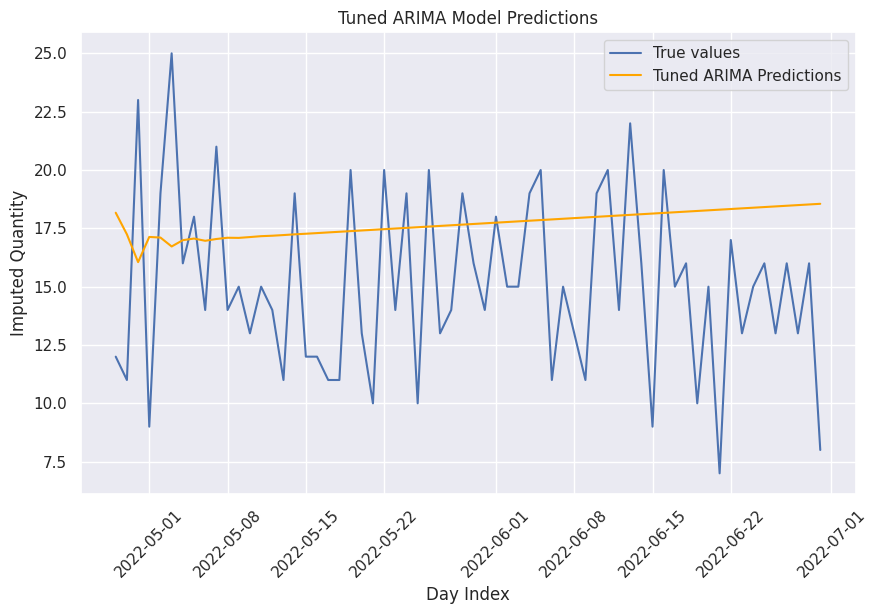

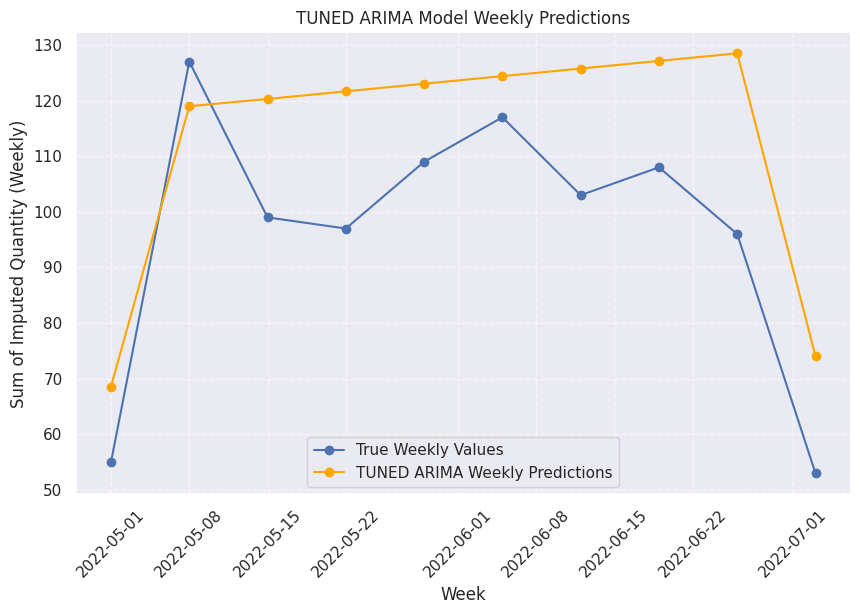

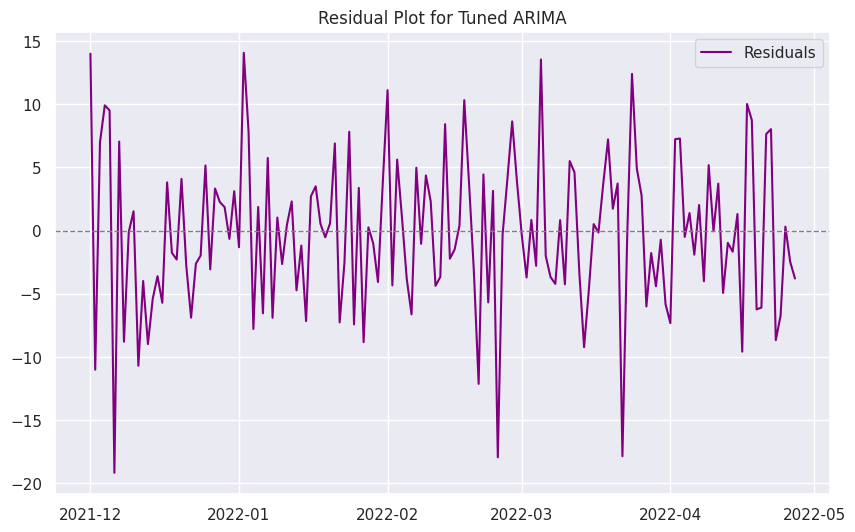

In [ ]:
# Fit ARIMA with best parameters
arima_tuned_model = ARIMA(train,
                          order=(best_arima_params['p'], best_arima_params['d'], best_arima_params['q']))
arima_tuned_model_fit = arima_tuned_model.fit()

# Predict with ARIMA tuned
arima_tuned_predictions = arima_tuned_model_fit.forecast(len(test))

# Evaluate ARIMA tuned
arima_tuned_metrics = calculate_metrics(test, arima_tuned_predictions)
print("ARIMA Tuned Metrics:", arima_tuned_metrics)

# Plot ARIMA tuned predictions
plot_model_predictions(test, arima_tuned_predictions, "Tuned ARIMA")
plot_weekly_comparison(test,arima_tuned_predictions, "TUNED ARIMA")
plot_residuals(arima_tuned_model_fit, "Tuned ARIMA")




*   Seasonality not captured accurately.
*   Residuals higher.


SARIMA MODEL

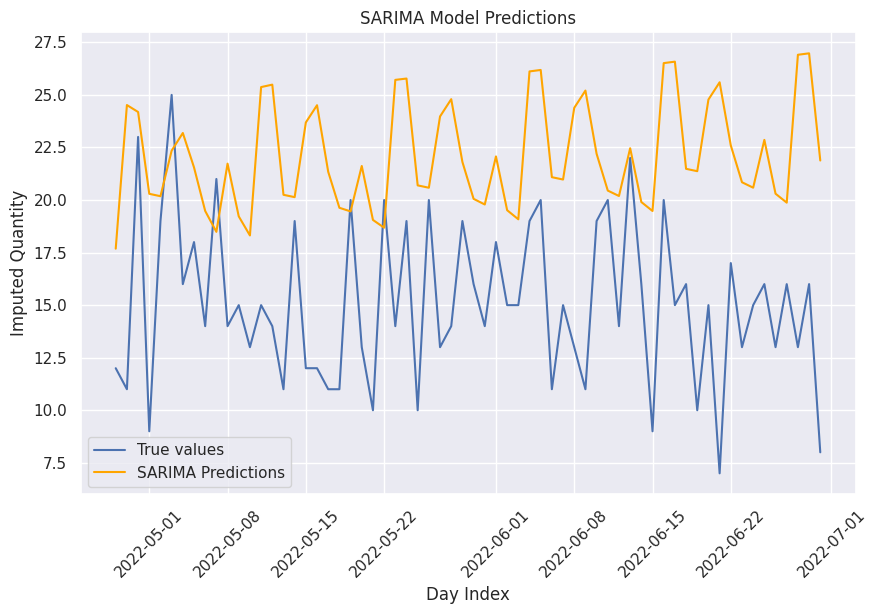

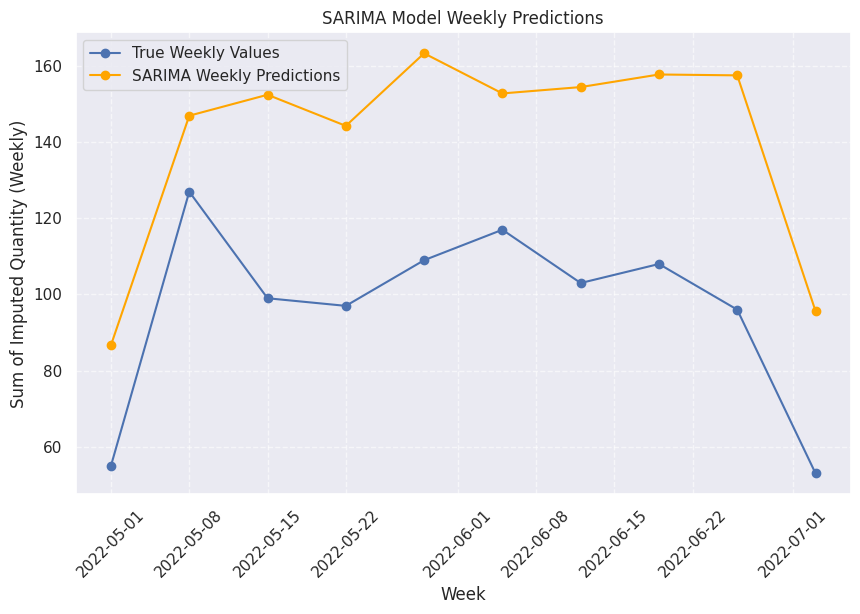

In [ ]:
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_model_fit = sarima_model.fit()
sarima_predictions = sarima_model_fit.forecast(len(test))

# Plot and Evaluate SARIMA Model
plot_model_predictions(test, sarima_predictions, "SARIMA")
sarima_metrics = calculate_metrics(test, sarima_predictions)
plot_weekly_comparison(test,sarima_predictions, "SARIMA")

*   Seasonality captured but modelling to be perfected by doing hyperparameter
     tuning.



In [ ]:
# SARIMA Hyperparameter Tuning
def objective_sarima(trial):
    p = trial.suggest_int("p", 1, 5)
    d = trial.suggest_int("d", 0, 2)
    q = trial.suggest_int("q", 1, 5)
    P = trial.suggest_int("P", 0, 2)
    D = trial.suggest_int("D", 0, 1)
    Q = trial.suggest_int("Q", 0, 2)
    s = 12  # Fixed seasonal period (monthly data)

    # Fit SARIMA with trial parameters
    model = SARIMAX(train,
                    order=(p, d, q),
                    seasonal_order=(P, D, Q, s))
    model_fit = model.fit()
    predictions = model_fit.forecast(len(test))

    # Return RMSE as the objective metric
    return np.sqrt(mean_squared_error(test, predictions))

# Create Optuna study for SARIMA
study_sarima = optuna.create_study(direction='minimize')
study_sarima.optimize(objective_sarima, n_trials=50)
best_sarima_params = study_sarima.best_params

# Print best SARIMA parameters
print("Best SARIMA Parameters:", best_sarima_params)


[I 2024-12-02 11:28:39,163] A new study created in memory with name: no-name-ab0c2b5b-86de-408c-913c-d38b690fe2b5
[I 2024-12-02 11:28:42,197] Trial 0 finished with value: 6.368438771828478 and parameters: {'p': 1, 'd': 0, 'q': 4, 'P': 0, 'D': 1, 'Q': 2}. Best is trial 0 with value: 6.368438771828478.
[I 2024-12-02 11:28:43,977] Trial 1 finished with value: 5.840396989119045 and parameters: {'p': 4, 'd': 1, 'q': 3, 'P': 1, 'D': 0, 'Q': 1}. Best is trial 1 with value: 5.840396989119045.
[I 2024-12-02 11:28:55,581] Trial 2 finished with value: 7.914328504968794 and parameters: {'p': 1, 'd': 1, 'q': 2, 'P': 2, 'D': 1, 'Q': 2}. Best is trial 1 with value: 5.840396989119045.
[I 2024-12-02 11:28:58,971] Trial 3 finished with value: 4.648543051494349 and parameters: {'p': 2, 'd': 2, 'q': 1, 'P': 1, 'D': 0, 'Q': 0}. Best is trial 3 with value: 4.648543051494349.
[I 2024-12-02 11:29:10,389] Trial 4 finished with value: 4.890799166030406 and parameters: {'p': 5, 'd': 2, 'q': 3, 'P': 1, 'D': 1, 'Q

Best SARIMA Parameters: {'p': 3, 'd': 0, 'q': 1, 'P': 0, 'D': 0, 'Q': 0}


SARIMA Tuned Metrics: (3.3760763257582918, 3.993901788929725, 15.951251499616054, 25.733007805245776)


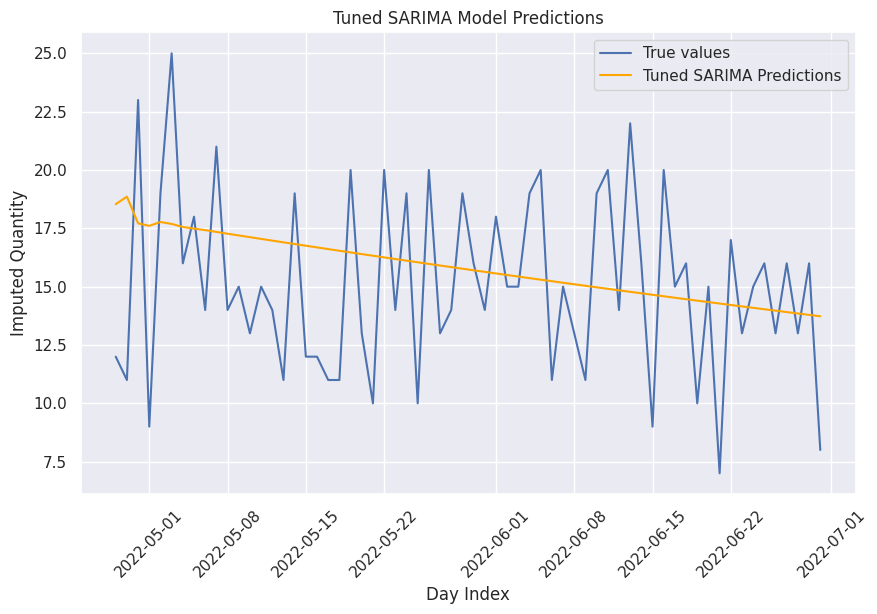

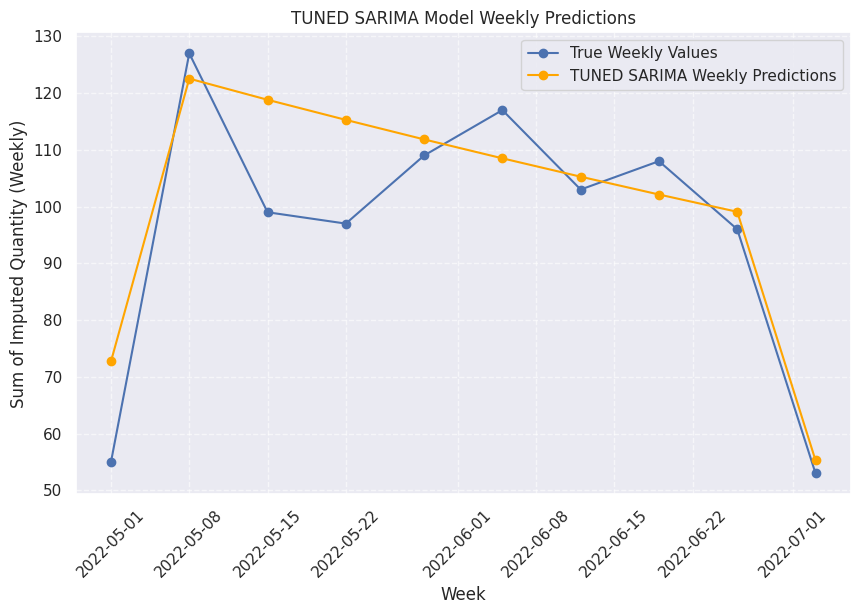

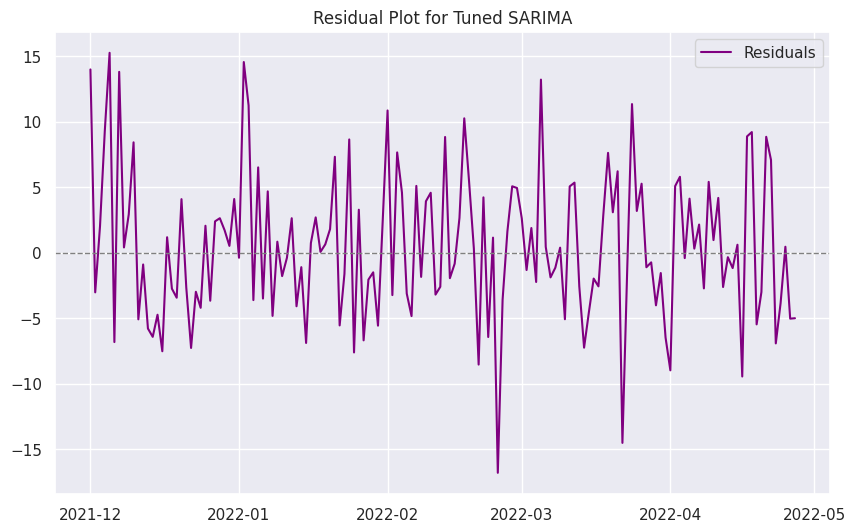

In [ ]:
# Fit SARIMA with best parameters
sarima_tuned_model = SARIMAX(train,
                             order=(best_sarima_params['p'], best_sarima_params['d'], best_sarima_params['q']),
                             seasonal_order=(best_sarima_params['P'], best_sarima_params['D'], best_sarima_params['Q'], 12))
sarima_tuned_model_fit = sarima_tuned_model.fit()

# Predict with SARIMA tuned
sarima_tuned_predictions = sarima_tuned_model_fit.forecast(len(test))

# Evaluate SARIMA tuned
sarima_tuned_metrics = calculate_metrics(test, sarima_tuned_predictions)
print("SARIMA Tuned Metrics:", sarima_tuned_metrics)

# Plot SARIMA tuned predictions
plot_model_predictions(test, sarima_tuned_predictions, "Tuned SARIMA")
plot_weekly_comparison(test,sarima_tuned_predictions, "TUNED SARIMA")
plot_residuals(sarima_tuned_model_fit, "Tuned SARIMA")






*   Seasonality not captured accurately.
*   Residuals lesser compared to previous model.


ARIMAX MODEL

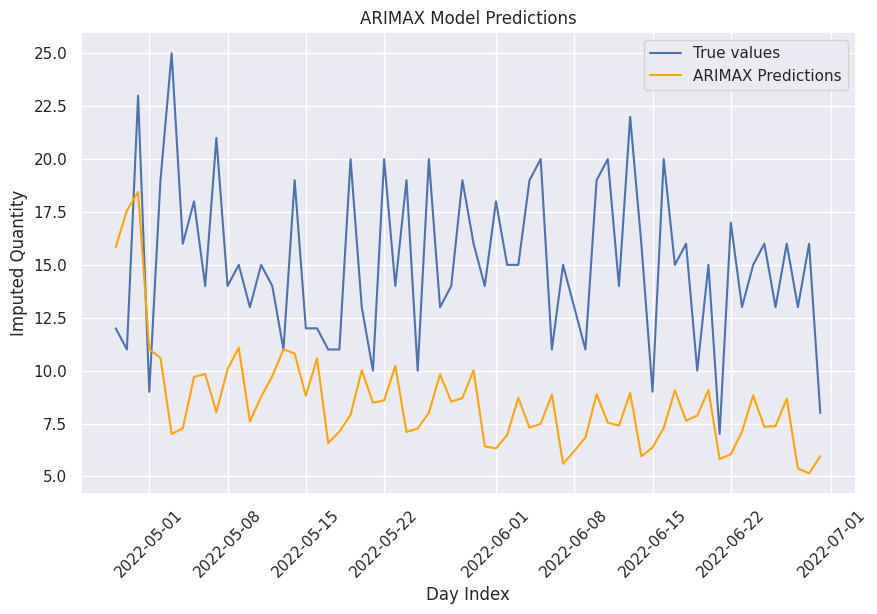

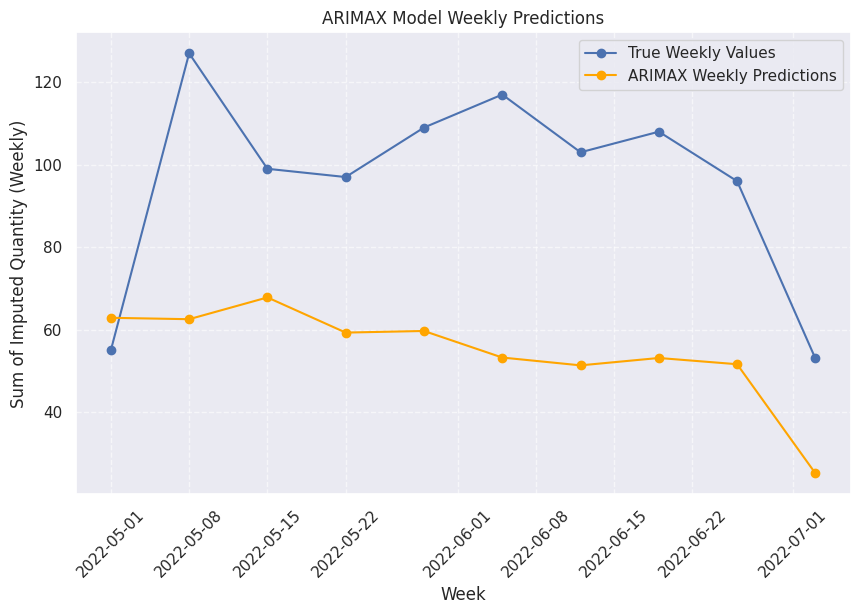

In [ ]:
arimax_model = ARIMA(train, order=(1, 1, 1), exog=train_exog)  # ARIMAX includes exogenous variables
arimax_model_fit = arimax_model.fit()
arimax_predictions = arimax_model_fit.forecast(len(test), exog=test_exog)

# Plotting the predictions
plot_model_predictions(test, arimax_predictions, "ARIMAX")

# Calculate metrics
arimax_metrics = calculate_metrics(test, arimax_predictions)
plot_weekly_comparison(test,arimax_predictions, "ARIMAX")

*   Seasonality captured but modelling to be perfected by doing hyperparameter
     tuning.



In [ ]:
def objective_arimax(trial):
    p = trial.suggest_int("p", 1, 5)
    d = trial.suggest_int("d", 0, 2)
    q = trial.suggest_int("q", 1, 5)

    # Fit ARIMAX model with trial parameters
    model = ARIMA(train, order=(p, d, q), exog=train_exog)
    model_fit = model.fit()
    predictions = model_fit.forecast(len(test), exog=test_exog)

    # Return RMSE as the objective metric
    return np.sqrt(mean_squared_error(test, predictions))

# Create Optuna study for ARIMAX
study_arimax = optuna.create_study(direction='minimize')
study_arimax.optimize(objective_arimax, n_trials=50)
best_arimax_params = study_arimax.best_params

# Print best ARIMAX parameters
print("Best ARIMAX Parameters:", best_arimax_params)


[I 2024-12-02 11:36:00,740] A new study created in memory with name: no-name-4a23aeb2-b490-4047-a714-b9bdd9e86b16
[I 2024-12-02 11:36:12,707] Trial 0 finished with value: 7.888307914696008 and parameters: {'p': 1, 'd': 1, 'q': 1}. Best is trial 0 with value: 7.888307914696008.
[I 2024-12-02 11:36:24,617] Trial 1 finished with value: 4.973877359702159 and parameters: {'p': 5, 'd': 0, 'q': 2}. Best is trial 1 with value: 4.973877359702159.
[I 2024-12-02 11:36:45,522] Trial 2 finished with value: 5.518588164817325 and parameters: {'p': 4, 'd': 1, 'q': 5}. Best is trial 1 with value: 4.973877359702159.
[I 2024-12-02 11:36:48,123] Trial 3 finished with value: 4.965800148143987 and parameters: {'p': 2, 'd': 0, 'q': 4}. Best is trial 3 with value: 4.965800148143987.
[I 2024-12-02 11:36:55,149] Trial 4 finished with value: 4.417971403031574 and parameters: {'p': 5, 'd': 2, 'q': 1}. Best is trial 4 with value: 4.417971403031574.
[I 2024-12-02 11:36:57,074] Trial 5 finished with value: 4.8565474

Best ARIMAX Parameters: {'p': 5, 'd': 2, 'q': 1}


ARIMAX Tuned Metrics: (3.451727615729557, 4.417971403031574, 19.518471318004774, 23.193105129498086)


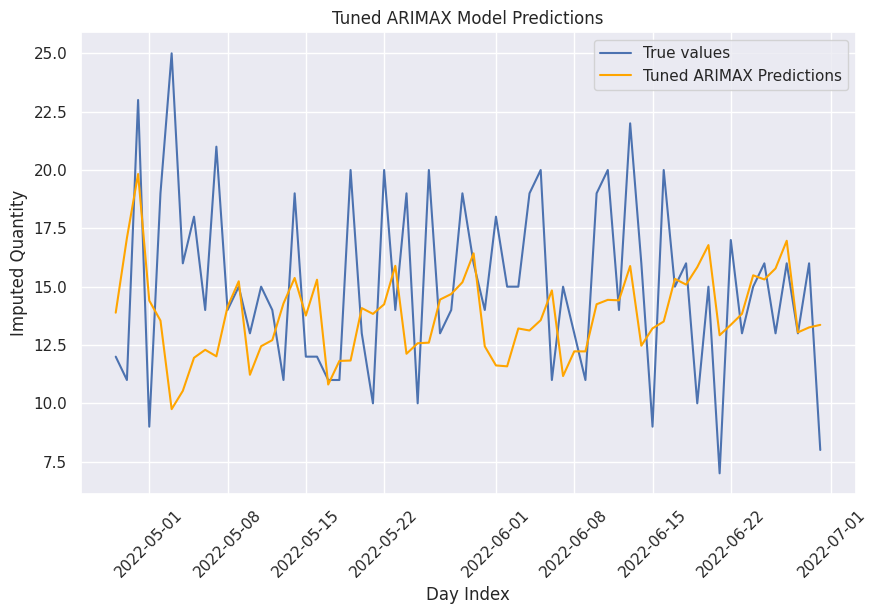

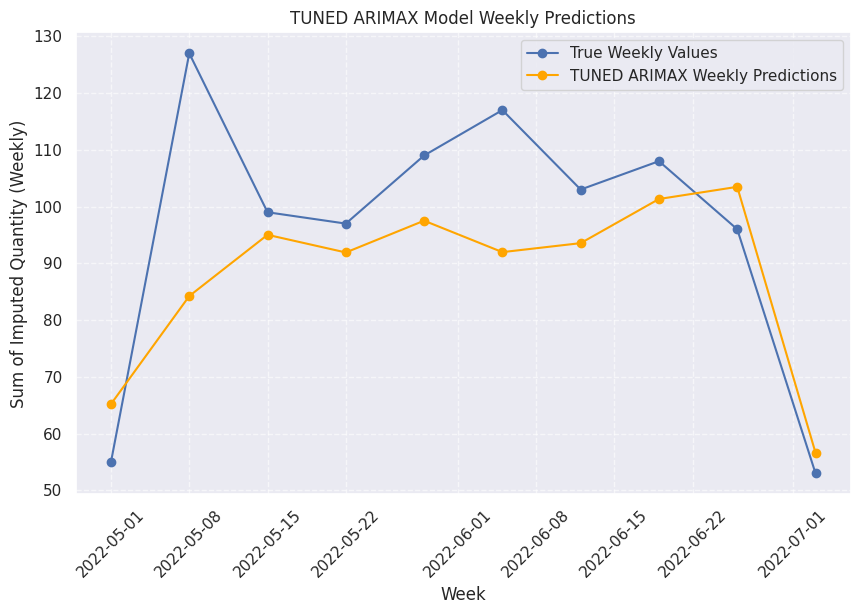

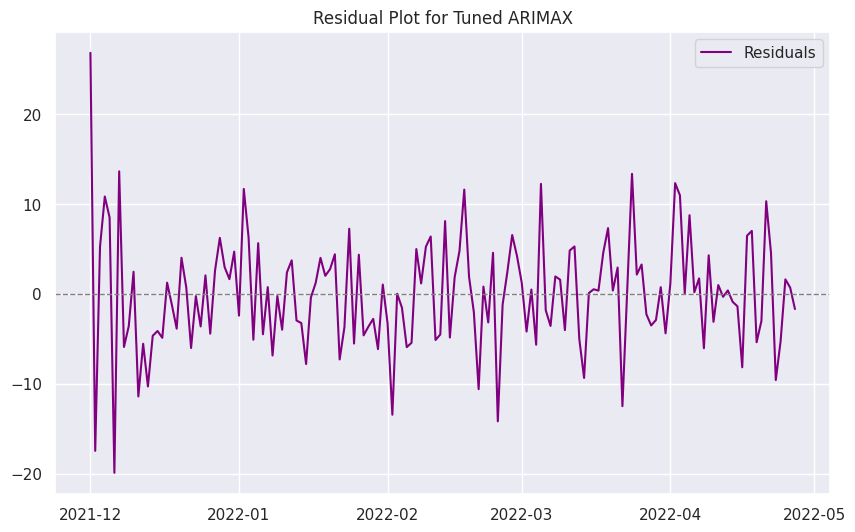

In [ ]:


arimax_tuned_model = ARIMA(train,
                           order=(best_arimax_params['p'], best_arimax_params['d'], best_arimax_params['q']),
                           exog=train_exog)
arimax_tuned_model_fit = arimax_tuned_model.fit()

# Predict with ARIMAX tuned model
arimax_tuned_predictions = arimax_tuned_model_fit.forecast(len(test), exog=test_exog)

# Evaluate ARIMAX tuned model
arimax_tuned_metrics = calculate_metrics(test, arimax_tuned_predictions)
print("ARIMAX Tuned Metrics:", arimax_tuned_metrics)

# Plot ARIMAX tuned predictions
plot_model_predictions(test, arimax_tuned_predictions, "Tuned ARIMAX")

plot_weekly_comparison(test,arimax_tuned_predictions, "TUNED ARIMAX")
plot_residuals(arimax_tuned_model_fit, "Tuned ARIMAX")


*   Model captures seasonality.
*   Less spread residual plot indicating lower values for residuals.



SARIMAX MODEL

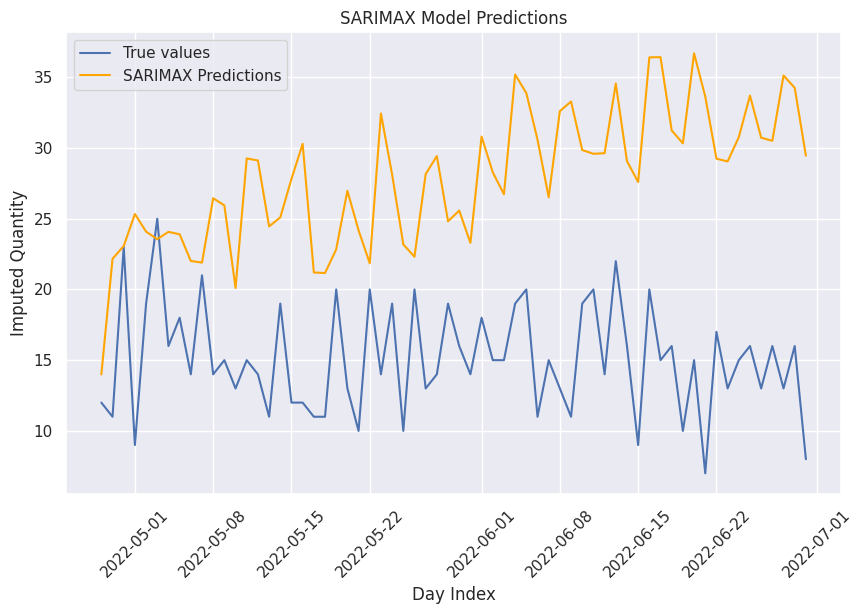

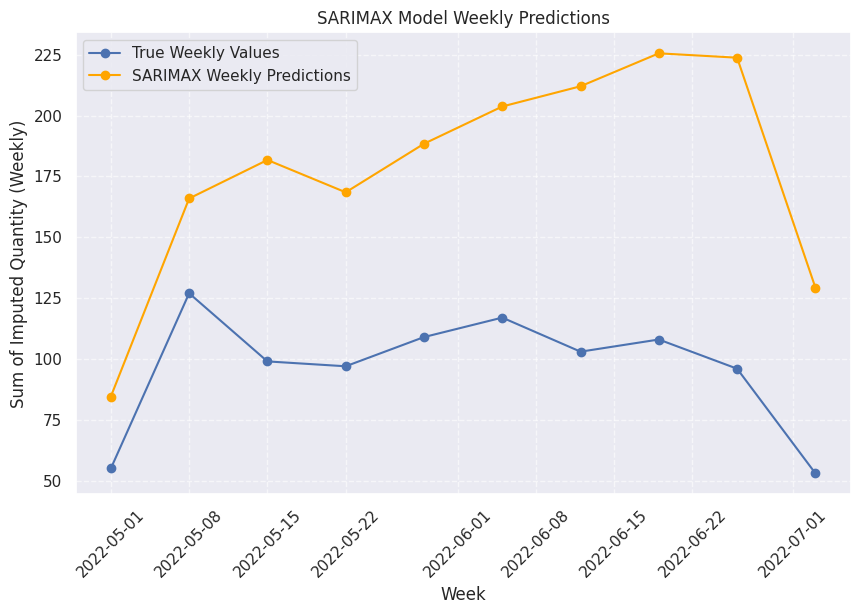

In [ ]:
sarimax_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), exog=train_exog)  # SARIMAX includes exogenous variables
sarimax_model_fit = sarimax_model.fit()
sarimax_predictions = sarimax_model_fit.forecast(len(test), exog=test_exog)

# Plotting the predictions
plot_model_predictions(test, sarimax_predictions, "SARIMAX")

# Calculate metrics
sarimax_metrics = calculate_metrics(test, sarimax_predictions)
plot_weekly_comparison(test,sarimax_predictions, "SARIMAX")

*   Seasonality captured but modelling to be perfected by doing hyperparameter
     tuning.



In [ ]:
def objective_sarimax(trial):
    p = trial.suggest_int("p", 1, 5)
    d = trial.suggest_int("d", 0, 2)
    q = trial.suggest_int("q", 1, 5)
    P = trial.suggest_int("P", 0, 2)
    D = trial.suggest_int("D", 0, 1)
    Q = trial.suggest_int("Q", 0, 2)
    s = 12  # Fixed seasonal period (monthly data)

    # Fit SARIMAX with trial parameters
    model = SARIMAX(train,
                    order=(p, d, q),
                    seasonal_order=(P, D, Q, s),
    enforce_stationarity=True,
    enforce_invertibility=True,
                    exog=train_exog)
    model_fit = model.fit()
    predictions = model_fit.forecast(len(test), exog=test_exog)

    # Return RMSE as the objective metric
    return np.sqrt(mean_squared_error(test, predictions))

# Create Optuna study for SARIMAX
study_sarimax = optuna.create_study(direction='minimize')
study_sarimax.optimize(objective_sarimax, n_trials=50)
best_sarimax_params = study_sarimax.best_params

# Print best SARIMAX parameters
print("Best SARIMAX Parameters:", best_sarimax_params)


[I 2024-12-02 12:31:16,264] A new study created in memory with name: no-name-69c9e0e3-c8b0-40da-a7ba-bd14352b3072
[I 2024-12-02 12:31:29,236] Trial 0 finished with value: 13.271811326274927 and parameters: {'p': 3, 'd': 1, 'q': 3, 'P': 1, 'D': 1, 'Q': 1}. Best is trial 0 with value: 13.271811326274927.
[I 2024-12-02 12:31:32,857] Trial 1 finished with value: 7.366168390432374 and parameters: {'p': 5, 'd': 0, 'q': 2, 'P': 0, 'D': 0, 'Q': 0}. Best is trial 1 with value: 7.366168390432374.
[I 2024-12-02 12:32:08,966] Trial 2 finished with value: 5.19011066348763 and parameters: {'p': 2, 'd': 0, 'q': 3, 'P': 2, 'D': 1, 'Q': 1}. Best is trial 2 with value: 5.19011066348763.
[I 2024-12-02 12:32:17,286] Trial 3 finished with value: 7.5625994232835305 and parameters: {'p': 1, 'd': 0, 'q': 1, 'P': 0, 'D': 0, 'Q': 2}. Best is trial 2 with value: 5.19011066348763.
[I 2024-12-02 12:32:25,222] Trial 4 finished with value: 9.648709585678239 and parameters: {'p': 2, 'd': 2, 'q': 1, 'P': 0, 'D': 1, 'Q

Best SARIMAX Parameters: {'p': 3, 'd': 0, 'q': 4, 'P': 0, 'D': 1, 'Q': 1}


SARIMAX Tuned Metrics: (3.5467045871752783, 4.393252267308555, 19.300665484211763, 25.967303400916887)


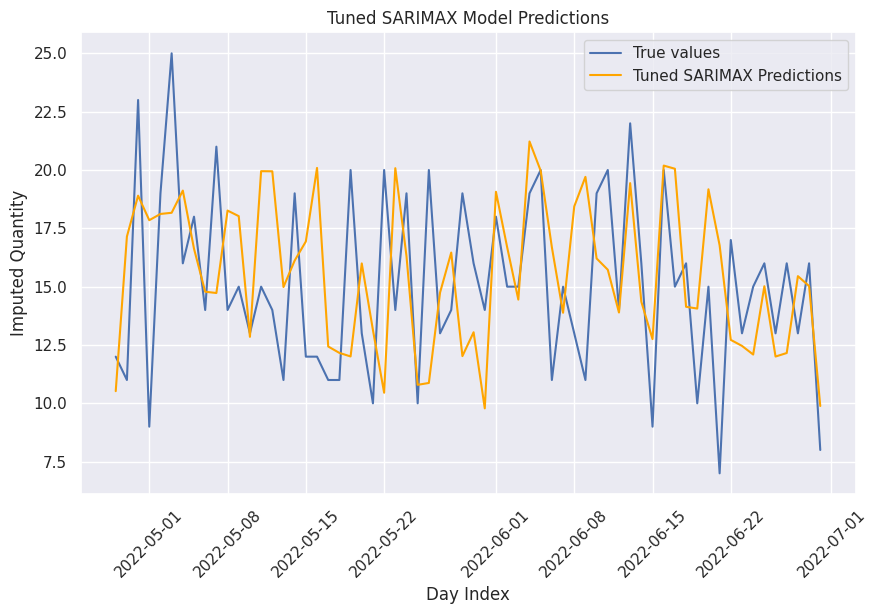

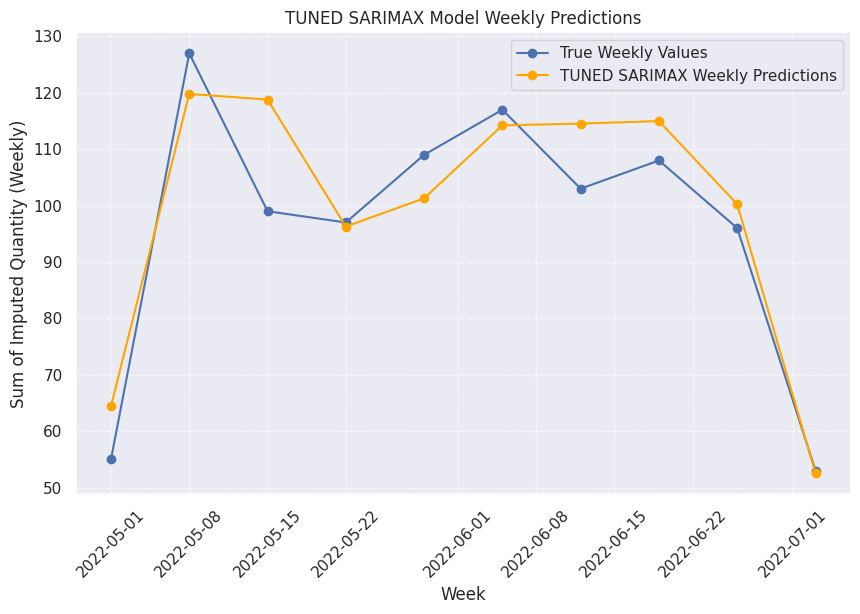

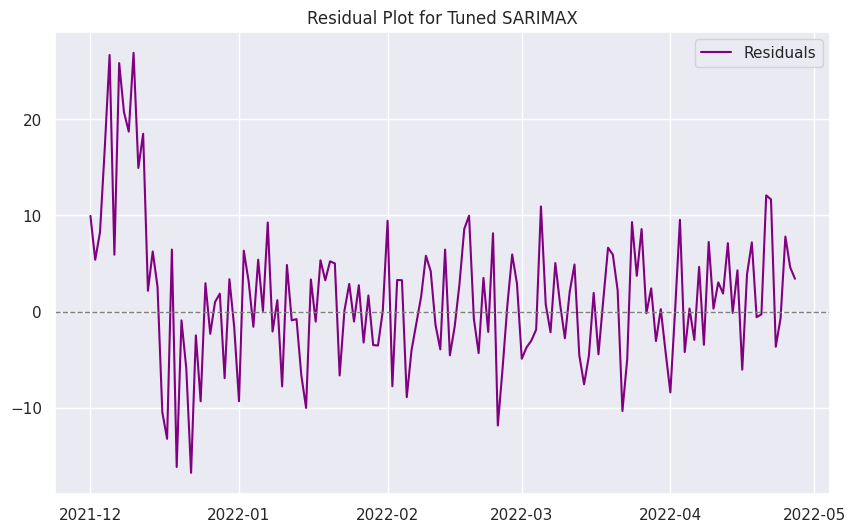

In [ ]:
sarimax_tuned_model = SARIMAX(train,
                              order=(best_sarimax_params['p'], best_sarimax_params['d'], best_sarimax_params['q']),
                              seasonal_order=(best_sarimax_params['P'], best_sarimax_params['D'], best_sarimax_params['Q'], 12),
                              exog=train_exog)
sarimax_tuned_model_fit = sarimax_tuned_model.fit()

# Predict with SARIMAX tuned model
sarimax_tuned_predictions = sarimax_tuned_model_fit.forecast(len(test), exog=test_exog)

# Evaluate SARIMAX tuned model
sarimax_tuned_metrics = calculate_metrics(test, sarimax_tuned_predictions)
print("SARIMAX Tuned Metrics:", sarimax_tuned_metrics)

# Plot SARIMAX tuned predictions
plot_model_predictions(test, sarimax_tuned_predictions, "Tuned SARIMAX")
plot_weekly_comparison(test,sarimax_tuned_predictions, "TUNED SARIMAX")
plot_residuals(sarimax_tuned_model_fit, "Tuned SARIMAX")



*   Seasonality maximum captured.
*   Least residuals.
*   Residuals close to mid-value in Residual plot.

In [ ]:
# Evaluation metrics before hyperparameter tuning
metrics_before = pd.DataFrame({
    "Model": ["AR", "MA", "ARIMA", "SARIMA", "ARIMAX", "SARIMAX"],
    "MAE": [ar_metrics[0], ma_metrics[0], arima_metrics[0], sarima_metrics[0], arimax_metrics[0], sarimax_metrics[0]],
    "RMSE": [ar_metrics[1], ma_metrics[1], arima_metrics[1], sarima_metrics[1], arimax_metrics[1], sarimax_metrics[1]],
    "MSE": [ar_metrics[2], ma_metrics[2], arima_metrics[2], sarima_metrics[2], arimax_metrics[2], sarimax_metrics[2]],
    "MAPE": [ar_metrics[3], ma_metrics[3], arima_metrics[3], sarima_metrics[3], arimax_metrics[3], sarimax_metrics[3]],
})
print("Metrics Before Tuning")
print(metrics_before)


Metrics Before Tuning
     Model        MAE       RMSE         MSE       MAPE
0       AR   4.286008   5.076281   25.768626  35.395913
1       MA   4.299021   5.094176   25.950630  35.521704
2    ARIMA   5.219194   6.178560   38.174599  43.353707
3   SARIMA   7.220430   8.309928   69.054906  57.901700
4   ARIMAX   6.909809   7.888308   62.225402  43.096618
5  SARIMAX  12.855971  14.161707  200.553951  98.471875




*   Lower RMSE for R and MA  models.
*   Highest RMSE for SARIMAX model



HYPERPARAMETER TUNING

In [ ]:
# Create table for evaluation metrics after tuning
metrics_after = pd.DataFrame({
    "Model": ["AR", "MA", "ARIMA", "SARIMA", "ARIMAX", "SARIMAX"],
    "MAE": [ar_metrics[0], ma_metrics[0], arima_metrics[0], sarima_metrics[0], arimax_tuned_metrics[0], sarimax_tuned_metrics[0]],
    "RMSE": [ar_metrics[1], ma_metrics[1], arima_metrics[1], sarima_metrics[1], arimax_tuned_metrics[1], sarimax_tuned_metrics[1]],
    "MSE": [ar_metrics[2], ma_metrics[2], arima_metrics[2], sarima_metrics[2], arimax_tuned_metrics[2], sarimax_tuned_metrics[2]],
    "MAPE": [ar_metrics[3], ma_metrics[3], arima_metrics[3], sarima_metrics[3], arimax_tuned_metrics[3], sarimax_tuned_metrics[3]],
})

print("Evaluation Metrics After Hyperparameter Tuning")
print(metrics_after)


Evaluation Metrics After Hyperparameter Tuning
     Model       MAE      RMSE        MSE       MAPE
0       AR  4.286008  5.076281  25.768626  35.395913
1       MA  4.299021  5.094176  25.950630  35.521704
2    ARIMA  5.219194  6.178560  38.174599  43.353707
3   SARIMA  7.220430  8.309928  69.054906  57.901700
4   ARIMAX  3.451728  4.417971  19.518471  23.193105
5  SARIMAX  3.546705  4.393252  19.300665  25.967303




*   Highest RMSE for SARIMA
*   Lower RMSE for SARIMAX and ARIMAX



Conclusion
**********
SARIMAX model captures seasonality as well as minimizes RMSE errors.
Therefore we are going to prefer SARIMAX timeseries modelling for future reference.

WEEK 5 & 6
**********
MULTIVARIATE REGRESSION(DYNAMIC)
*********************************

In [ ]:
maindata=pd.read_excel(r'/content/drive/My Drive/infosys internship/Datasets/Feature_engineered_masterdata.xlsx')

In [ ]:
def plot_weekly_comparisons(true_values, predicted_values, date_index, model_name):

    # Create the weekly resampling of the data using 'Day Index'
    true_weekly = true_values.resample('W').sum()
    predicted_weekly = pd.Series(predicted_values, index=date_index).resample('W').sum()

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(true_weekly.index, true_weekly, label='True Weekly Values', marker='o')
    plt.plot(predicted_weekly.index, predicted_weekly, label=f'{model_name} Weekly Predictions', marker='o', color='orange')

    # Labeling the axes
    plt.xlabel("Week")
    plt.ylabel("Sum of Imputed Quantity (Weekly)")
    plt.title(f'{model_name} Model Weekly Predictions')
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed for readability

    # Adding the legend
    plt.legend()

    # Display the plot
    plt.grid(visible=True, linestyle='--', alpha=0.6)
    plt.show()

                              OLS Regression Results                              
Dep. Variable:     Imputed_Quantity_lag_1   R-squared:                       0.229
Model:                                OLS   Adj. R-squared:                  0.158
Method:                     Least Squares   F-statistic:                     3.229
Date:                    Tue, 03 Dec 2024   Prob (F-statistic):           0.000172
Time:                            07:01:52   Log-Likelihood:                -504.95
No. Observations:                     167   AIC:                             1040.
Df Residuals:                         152   BIC:                             1087.
Df Model:                              14                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

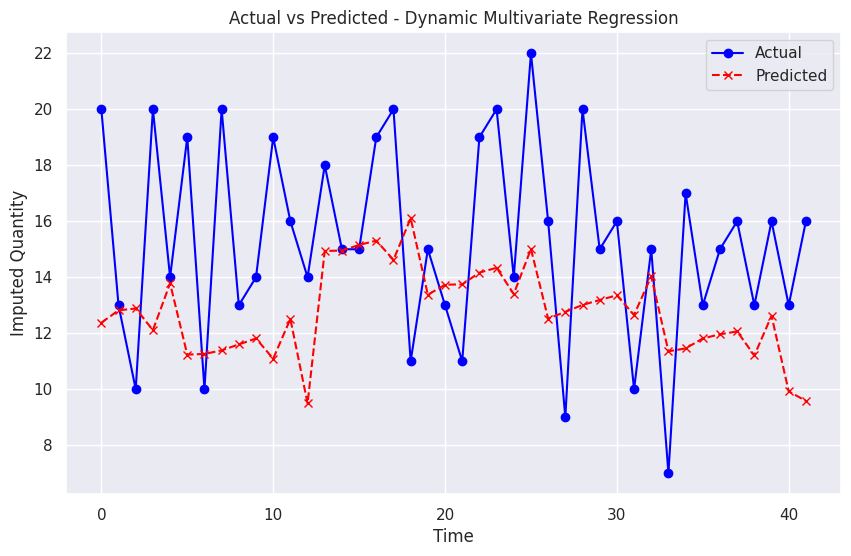

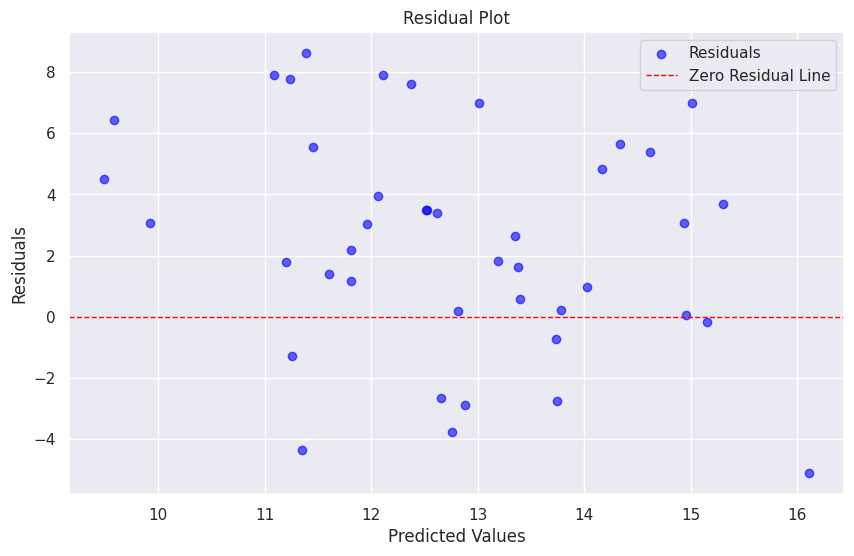

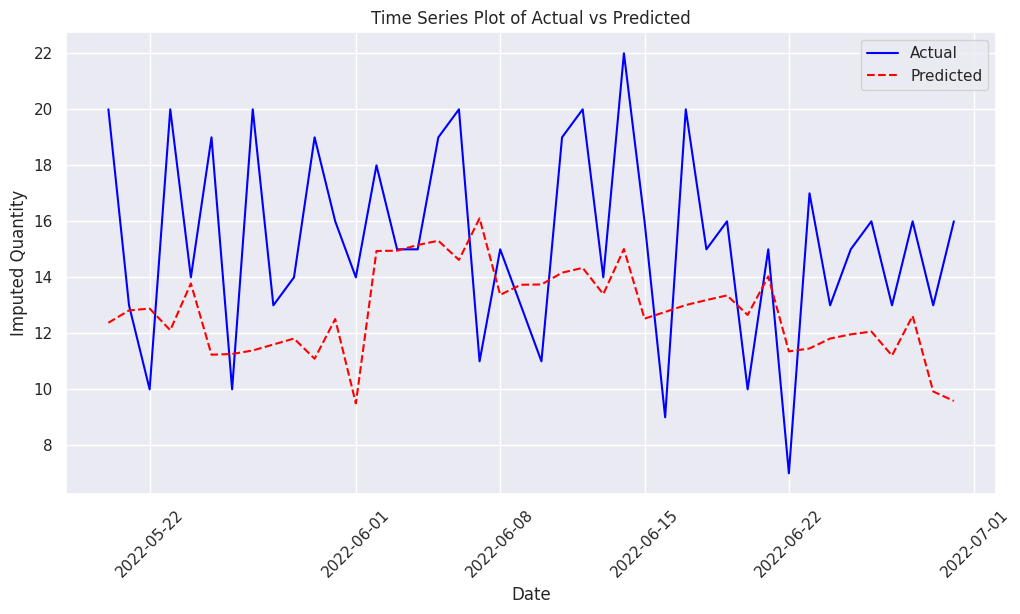

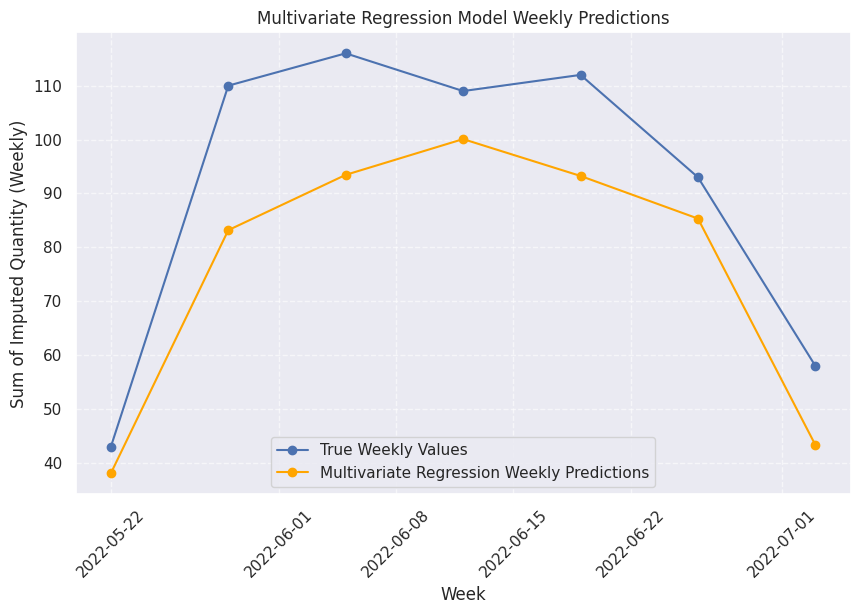

In [ ]:

# Step 1: Prepare the Data (Assuming 'maindata' is the dataframe you have)
# Ensure the dataframe is sorted by 'Day Index'
maindata = maindata.sort_values('Day Index')

# Ensure 'Day Index' is in datetime format and set it as the index
maindata['Day Index'] = pd.to_datetime(maindata['Day Index'])
maindata.set_index('Day Index', inplace=True)  # Set 'Day Index' as the index

# Step 2: Create lagged features (e.g., 3 lags for both target and predictors)
def create_lagged_features(df, target_col, lag_cols, max_lags=3):
    for col in lag_cols:
        for lag in range(1, max_lags + 1):
            df[f'{col}_lag_{lag}'] = df[col].shift(lag)

    # For the target variable, we create lagged features
    for lag in range(1, max_lags + 1):
        df[f'{target_col}_lag_{lag}'] = df[target_col].shift(lag)

    # Drop the rows with missing values due to shifting
    df = df.dropna()
    return df

# Specify the target column and the predictors
target_col = 'Imputed_Quantity'
predictors = ['Clicks', 'Impressions','Month_numeric','Weekofmonth','Dayofweek_numeric',
              'Monday','Tuesday','Wednesday','Thursday','Friday','January','February',
              'March','April','May','June','July','August','September','October','November','December']  # Add other columns as needed

# Step 3: Create lagged features
maindata = create_lagged_features(maindata, target_col, predictors, max_lags=3)

# Step 4: Prepare the data for regression
# We'll only use the lag_1 values for both predictors and target variable
X = maindata[[f'{col}_lag_1' for col in predictors]]
X = sm.add_constant(X)  # Add a constant term (intercept)

# Use the 'lag_1' for the target variable
y = maindata[f'{target_col}_lag_1']  # Only take the lag_1 target

# Ensure no NaN or infinite values in X and y
X = X.replace([np.inf, -np.inf], np.nan).dropna()  # Remove inf/nan from X
y = y.loc[X.index]  # Align y with the cleaned X

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 6: Fit the regression model
model = sm.OLS(y_train, X_train).fit()

# Step 7: Get the model summary
print(model.summary())

# Step 8: Make predictions
y_pred = model.predict(X_test)

# Optional: Evaluate model performance (e.g., RMSE)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print the error metrics
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

# ------------- Plotting -------------------

# 1. Plot Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='blue', marker='o')
plt.plot(y_pred.values, label='Predicted', color='red', linestyle='--', marker='x')
plt.title('Actual vs Predicted - Dynamic Multivariate Regression')
plt.xlabel('Time')
plt.ylabel('Imputed Quantity')
plt.legend()
plt.grid(True)
plt.show()

# 2. Simplified Residual Plot
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.6, label='Residuals')  # Label for residuals
plt.axhline(y=0, color='red', linestyle='--', linewidth=1, label='Zero Residual Line')  # Label for the reference line
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()  # Display the legend
plt.grid(True)
plt.show()

# 3. Time Series Plot of Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.plot(maindata.index[-len(y_test):], y_test, label='Actual', color='blue')
plt.plot(maindata.index[-len(y_test):], y_pred, label='Predicted', color='red', linestyle='--')
plt.title('Time Series Plot of Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Imputed Quantity')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()



# Call the weekly comparison plot function
plot_weekly_comparisons(y_test, y_pred, maindata.index[-len(y_test):], model_name='Multivariate Regression')




*   RMSE of 4.34.
*   Multivariate regression captures seasonality butt doesn't generalize well.
*   Inconsistently spread residuals.





CONCLUSION

* SARIMAX MODEL PREDICTIONS CAPTURED SEASONALITY AS WELL AS GENERALIZED WELL TO DATA WHILE MODELLING BETTER THAN MULTIVARIATE REGRESSION(DYNAMIC).
* SARIMAX MODEL GAVE A LOW RMSE ERROR OF 4.39 AND VERY GOOD PERFORMANCE WITH THE PARAMETERS : {'p': 3, 'd': 0, 'q': 4, 'P': 0, 'D': 1, 'Q': 1} WHILE MULTIVARIATE REGRESSION GAVE A INFERIOR PERFORMANCE WITH A RMSE OF 4.34.
* FINALLY WE ARE CHOOSING THE SARIMAX MODEL FOR FORECASTING WITH THE PARAMETERS
  : {'p': 3, 'd': 0, 'q': 4, 'P': 0, 'D': 1, 'Q': 1}.
